#**Predicting Employee Attrition Using IBM Dataset**


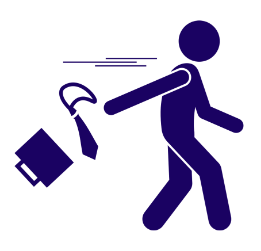
###**Background:**

Employee attrition, defined as the reduction in the workforce due to employees leaving the company through resignation or other reasons, is a critical issue for many organizations, affecting productivity, morale, and financial performance. Understanding the factors that contribute to employee turnover can help companies take proactive measures to retain talent and improve overall workplace satisfaction.

###**The objective:** Develop a machine learning model capable of predicting when an employee is likely to resign.

Our solution involves using data analytics and machine learning to predict which employee is likely to resign and predict the moment when this employee will leave the company. By analyzing various factors such as job satisfaction, monthly income, age, and other relevant data, we can identify patterns and trends that indicate a higher likelihood of attrition.

###**Approach:**

1.   Data Collection
2.   Exploratory Data Analysis (EDA)
3.   Data Preprocessing
4.   Feature Engineering
5.   Model Development
6.   Model Evaluation
7.   Prediction and Interpretation
8.   Implementation

###**Expected Outcomes:**
*   A reliable machine learning model that accurately predicts employee attrition.
*   Identification of key factors contributing to employee turnover.
*   Proactive strategies and interventions to retain high-risk employees.
*   Improved employee satisfaction and reduced turnover rates.


# Import libraries

*   **pandas**:

pandas is a powerful data manipulation and analysis library. It provides data structures like DataFrame that are essential for handling structured data. pandas allows you to easily read, write, and manipulate data,

*   **numpy**:

numpy is fundamental for numerical computing in Python. It is essential for performing numerical operations efficiently, which is critical for tasks such as data preprocessing and mathematical computations.

*   **matplotlib.pyplot**:

matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python.


*   **seaborn**:

seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive statistical graphics. It provides options to customize the appearance of plots and integrates well with pandas DataFrames, making it ideal for exploratory data analysis and presenting results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

####The first step I chose is Exploratory Data Analysis (EDA) for:


*   Understanding the main characteristics of the data.

*   Visualizing the data to detect patterns, anomalies, and relationships.

*   Generating summary statistics.

1.   After importing the libraries, the next step is to load the data into the dataframe. We will use the **[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)** dataset from **Kaggle**:





In [2]:
df=pd.read_csv('IBM_Dataset.csv')

2.  Now that the data has been loaded, let's check the first 5 rows of the dataset:

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


3.  I want to display all columns so let's set an option:

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


4.  Check the number of rows and columns in the dataset:

In [6]:
df.shape

(1470, 35)

5.  Now, I want to check the data types and do a concise summary of all variables in the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

6.  Let's display the summary statistics of the numerical columns using `df.describe()`

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


7.   Let's handle missing values:

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

↪ No missing values to worry about. 😃

8.   Let's handle duplicated rows now :

In [10]:
df.duplicated().sum()

0

↪ And there is no duplicated rows to worry about. 😃

9. I want to show the distribution of our target variable **Attrition** to see how many employees left and stayed:


In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

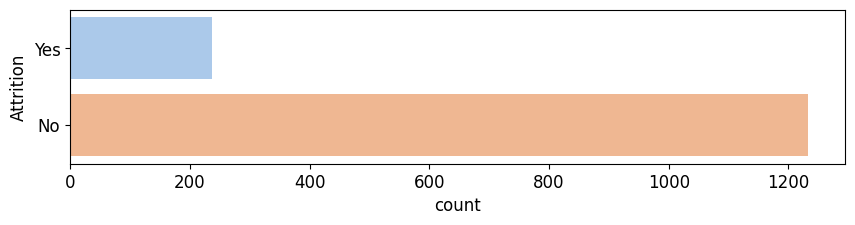

In [12]:
plt.figure(figsize=(10,2))
plt.rc("font", size=12)
sns.countplot(y='Attrition', data=df, hue='Attrition', palette='pastel')
plt.legend([],[],frameon=False)
plt.show()

↪ There are **1233** employees who did not leave (Attrition: No) and **237** employees who left (Attrition: Yes)

10.  Let's check the distribution of employees across different departments:

In [13]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

11. Now, I want to examine **categorical variables** in this dataset by printing the value counts for each categorical column. This step is crucial to identify the unique variables in each column, which is essential for the upcoming **encoding** process:


In [14]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


Column: BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Column: Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Column: EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Column: Gender
Male      882
Female    588
Name: Gender, dtype: int64


Column: JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


Column: MaritalStatus
Marri

12. Let's explore the relationship between our target variable, **Attrition**, and the other features **to determine if there is any dependence**.
Starting with the feature **BusinessTravel**:

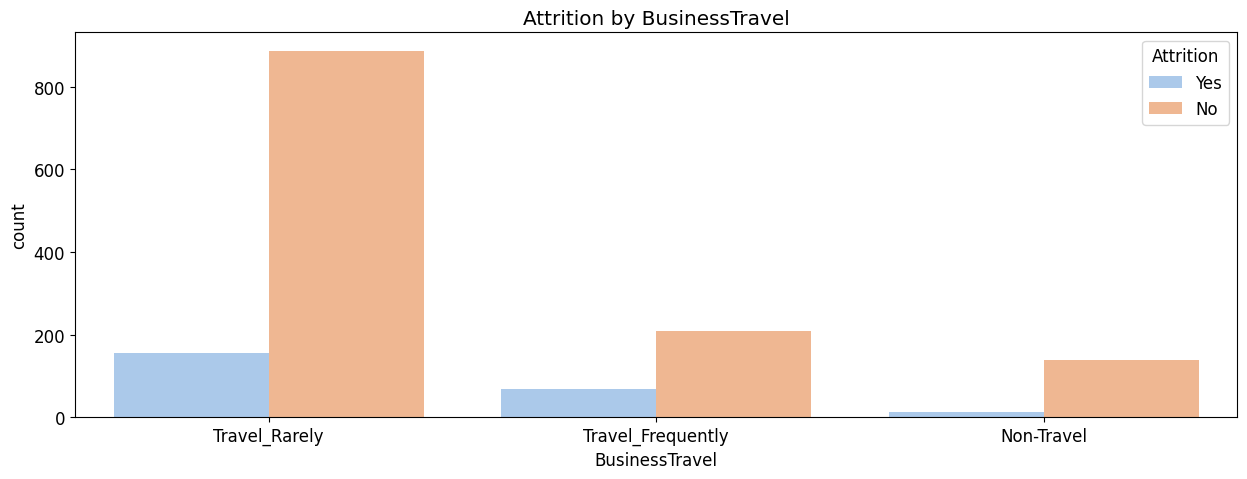

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=df, palette='pastel')
plt.title("Attrition by BusinessTravel")
plt.show()


**Interpretation of Attrition by BusinessTravel**

---

From this chart, we can observe the following:

*    **Travel_Rarely:**

The majority of employees in this category have not left the company.

*    **Travel_Frequently:**

There is a noticeable number of employees who travel frequently and have left the company.

*    **Non-Travel:**

The number of non-traveling employees who have left the company is relatively low compared to those who stay.

↪ Overall, it seems that employees **who travel frequently are more likely to leave the company** compared to those who travel rarely or do not travel at all. This suggests a potential dependence : between the frequency of business travel and employee attrition.


---



Now we'll see the attrition by **department**:


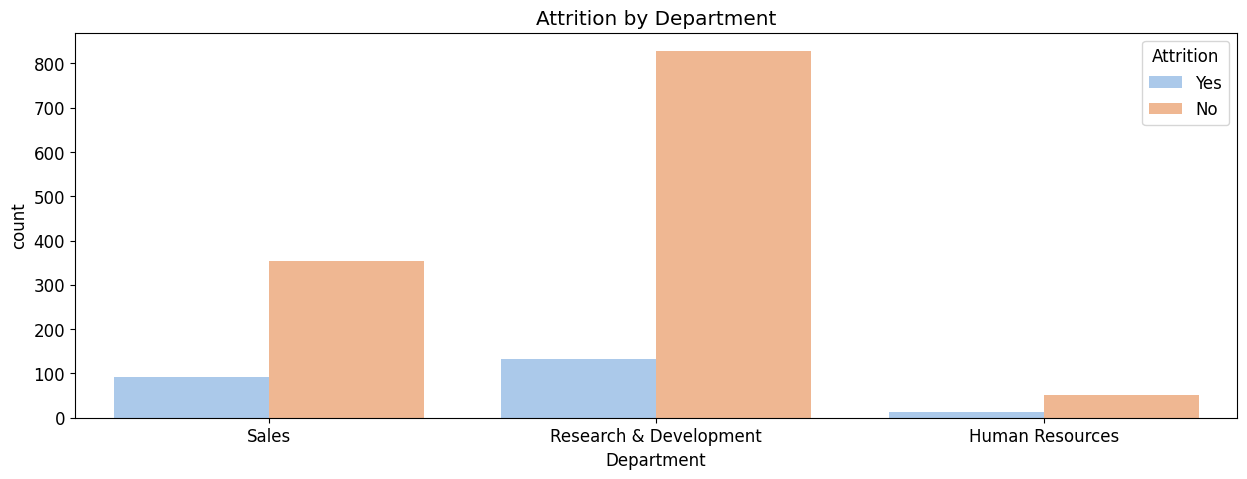

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Department',hue='Attrition', data=df, palette='pastel')
plt.title("Attrition by Department")
plt.show()

**Interpretation of Attrition by Department**

---

From the bar chart, we can observe the following:

*    **Sales:**

There is a noticeable number of employees in the Sales department who have left the company. However, the number of employees who have stayed is higher ↗ compared to those who have left.

*    **Research & Development:**

The majority of employees in this department have not left the company.
This department has the highest number of employees who stayed compared to the other departments.

*    **Human Resources:**

There are more employees who have stayed compared to those who have left.

↪  Overall, it seems that **the Research & Development department has the lowest ↘ attrition rate**, while **the Sales department shows a higher attrition rate ↗ compared to the other departments**. This suggests a potential dependence between the department and employee attrition.


---


Let's determine if there is any dependence with **EducationField**:

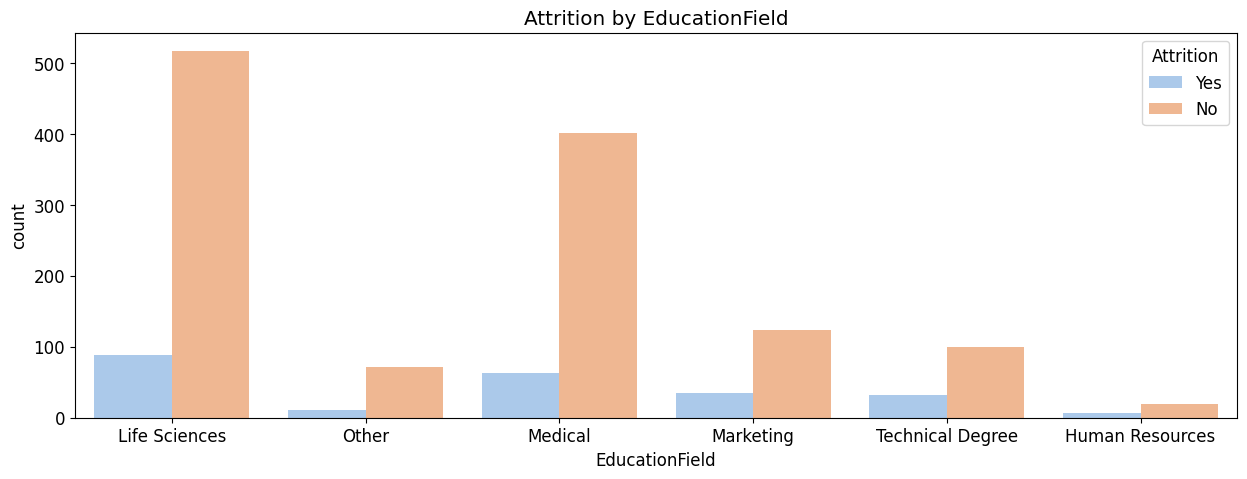

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='EducationField',hue='Attrition', data=df, palette='pastel')
plt.title("Attrition by EducationField")
plt.show()

**Interpretation of Attrition by EducationField**

---

From the bar chart, we can observe the following:

*    **Life Sciences** and **Medical** fields:

Have the highest number of employees who have stayed, with relatively fewer employees leaving.

*    **Marketing** and **Technical Degree** fields:

Also show more employees staying than leaving, but the gap between those who stay and leave is smaller compared to Life Sciences and Medical fields.

*    **Other** and **Human Resources** fields:

Have very few employees in total, with a small tendency for more employees to stay rather than leave.

↪  Overall, **employees in Life Sciences and Medical fields are more likely to stay**, indicating **a lower ↘ attrition rate** in these fields, while the other fields show a more balanced distribution but with a higher tendency for employees to stay. This suggests that the field of education may have an impact on employee attrition.


---


Now we'll see the attrition by **Gender**:

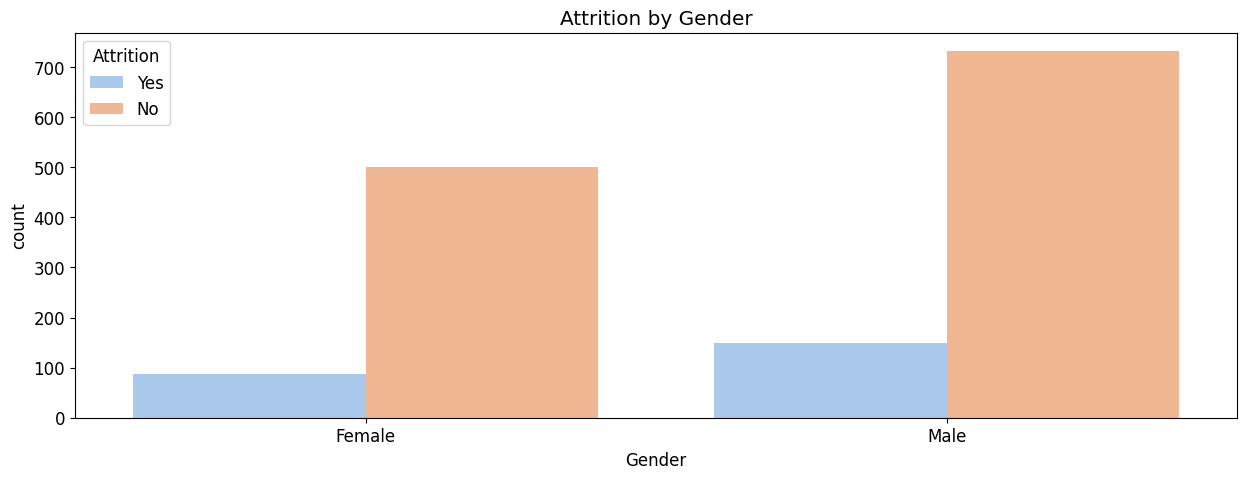

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='Gender',hue='Attrition', data=df, palette='pastel')
plt.title("Attrition by Gender")
plt.show()

**Interpretation of Attrition by Gender**

---


The bar plot shows that attrition is present in both genders. Although it appears that a higher number of male employees leave the company compared to female employees, this observation is influenced by the overall higher number of male employees (882) compared to female employees (588).

↪ **the rate of attrition is not strongly affected by gender**.


---


Let's visualize the impact of gender on attrition using percentages and the number of employees.

<Figure size 1500x500 with 0 Axes>

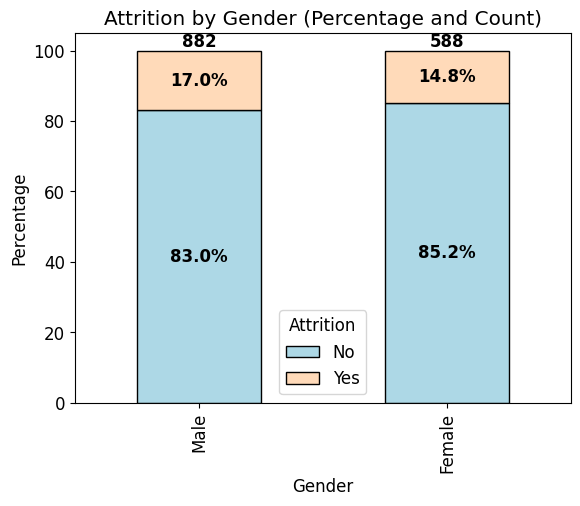

In [19]:
gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
gender_counts = df['Gender'].value_counts()

gender_attrition = gender_attrition.reindex(index=['Male', 'Female'])

plt.figure(figsize=(15,5))
ax = gender_attrition.plot(kind='bar', stacked=True, color=['lightblue', 'peachpuff'], edgecolor='black')

for i, (count, percent) in enumerate(zip(gender_counts, gender_attrition.values)):
    ax.text(i, percent[0] / 2, f"{percent[0]:.1f}%", ha='center', va='center', fontsize=12, color='black', fontweight='bold')
    ax.text(i, 100 - percent[1] / 2, f"{percent[1]:.1f}%", ha='center', va='center', fontsize=12, color='black', fontweight='bold')
    ax.text(i, 100, f"{count}", ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Attrition by Gender (Percentage and Count)")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(['No', 'Yes'], title='Attrition')
plt.show()


**Observations:**

For Female employees:
Total count: 588,
Percentage who left: 14.8%

For Male employees:
Total count: 882,
Percentage who left: 17.0%

**Keep the Feature:** Since there is a noticeable difference in attrition rates between genders, the 'Gender' feature could be an important factor in predicting attrition. Removing it might lead to a loss of valuable information that could improve the model's accuracy.



Let's determine if there is any dependence with **JobRole**:

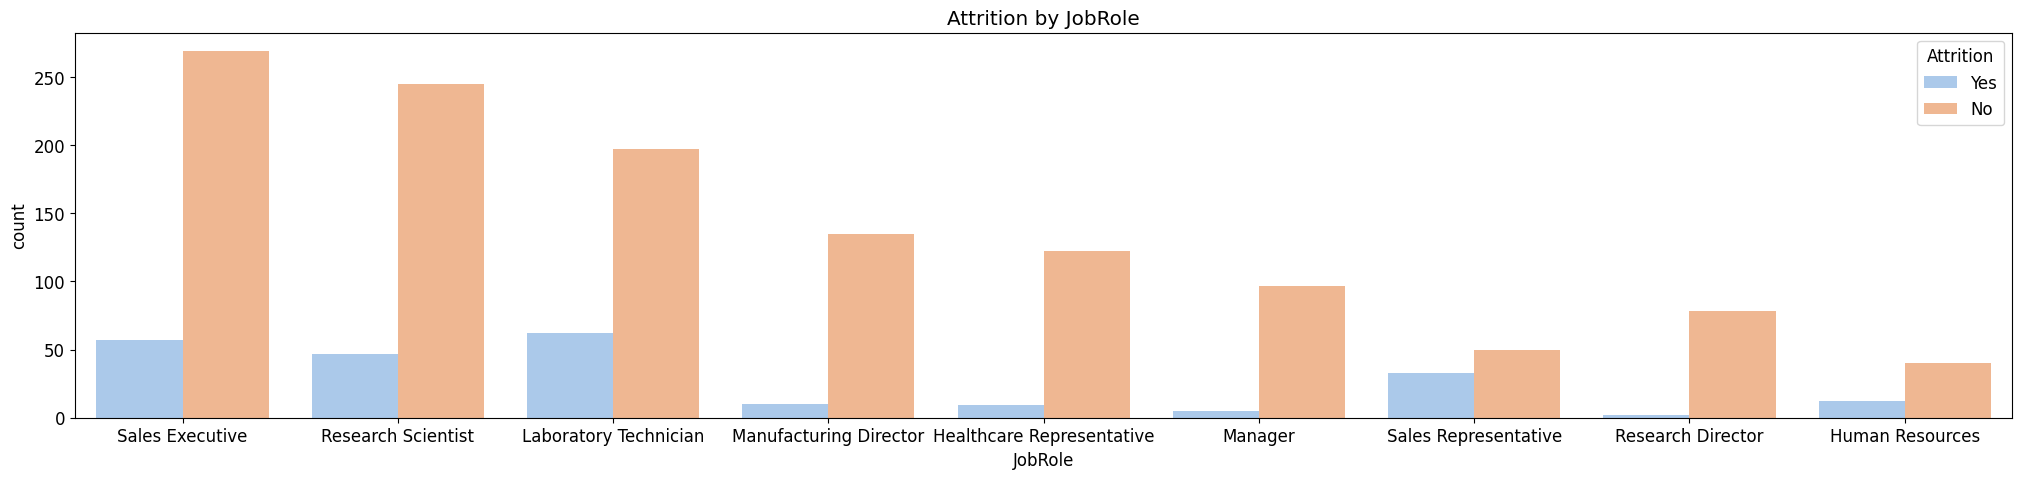

In [20]:
plt.figure(figsize=(25,5))
sns.countplot(x='JobRole',hue='Attrition', data=df, palette='pastel')
plt.title("Attrition by JobRole")
plt.show()

**Interpretation of Attrition by JobRole**

---
The bar plot highlights that attrition rates vary significantly across different job roles.

*    Job roles like **Sales Executive** and **Laboratory Technician** have a relatively **higher number of employees leaving** compared to other roles.

*    Job roles such as **Research Scientist**, **Manufacturing Director**, **Healthcare Representative**, **Research Director**, and **Manager** show **lower attrition rates**.

*   The **Human Resources** role has the **least attrition**.

---


Now we'll see the attrition by **MaritalStatus**:


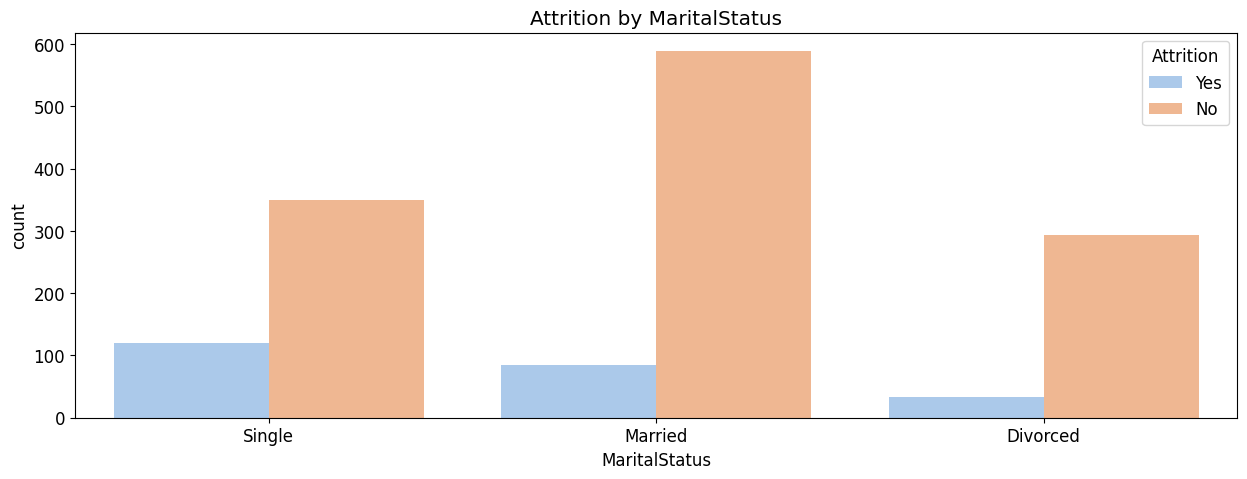

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='MaritalStatus',hue='Attrition', data=df, palette='pastel')
plt.title("Attrition by MaritalStatus")
plt.show()

**Interpretation of Attrition by MaritalStatus**

---
The bar chart reveals that:
*   **Married employees** are **more likely to stay with the company** compared to single or divorced employees.

*   **Single employees** show **a higher tendency to leave the company** compared to divorced employees.

---

Then the attrition by **OverTime**:

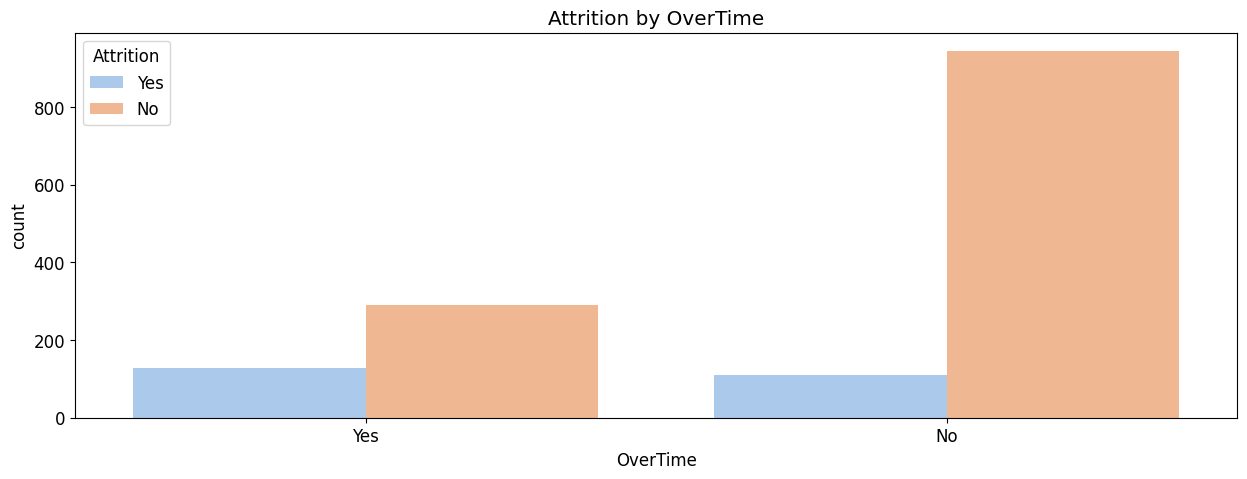

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='OverTime',hue='Attrition', data=df, palette='pastel')
plt.title("Attrition by OverTime")
plt.show()


**Interpretation of Attrition by OverTime**

---
The bar chart reveals that **employees who work overtime** have **a higher attrition rate** compared to those who do not.


###➡ **Importance of EDA in the Project:**

*   Understanding Data Distribution:


EDA helps us in understanding the distribution of different features and their relationship with attrition. This understanding is crucial for selecting relevant features for the predictive model and ensuring that the model is based on data-driven insights.

*   Identifying Key Factors:

By analyzing attrition rates across various features like **OverTime**, **Marital Status** , **Job Role** , **Gender**, **Education Field**, **Department**, and **Business Travel**, we can identify key factors that influence employee attrition. These factors are critical for building a robust predictive model.


## Using Agent (PandasAI)

In [23]:
!pip install pandasai

In [24]:
import os
from pandasai import Agent
import pandas as pd

os.environ["PANDASAI_API_KEY"] = "$2a$10$04aoijcWlo90UnZt6kd.8.T94GqsZhtTZtSO568w69E4nrRQaAOki"

agent = Agent(df)
agent.chat('Give me the number of emloyees left and stayed ')

ERROR:pandasai.helpers.logger:Pipeline failed on step 3: Your LLM inference limit has been reached. To upgrade, please contact us at https://forms.gle/JEUqkwuTqFZjhP7h8
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, pipeline_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/llm/base.py", line 201, in generate_code
    response = self.call(instruction, context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/llm/bamboo_llm.py", line 18, 

'Unfortunately, I was not able to answer your question, because of the following error:\n\nYour LLM inference limit has been reached. To upgrade, please contact us at https://forms.gle/JEUqkwuTqFZjhP7h8\n'

In [25]:
result = agent.chat("Can you make the attrition by marital status graph?")

ERROR:pandasai.helpers.logger:Pipeline failed on step 3: Your LLM inference limit has been reached. To upgrade, please contact us at https://forms.gle/JEUqkwuTqFZjhP7h8
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, pipeline_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/llm/base.py", line 201, in generate_code
    response = self.call(instruction, context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/llm/bamboo_llm.py", line 18, 

In [26]:
result1 = agent.chat("Monthly income is an important feature here?")

ERROR:pandasai.helpers.logger:Pipeline failed on step 3: Your LLM inference limit has been reached. To upgrade, please contact us at https://forms.gle/JEUqkwuTqFZjhP7h8
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 335, in run
    ).run(input)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/chat/code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, pipeline_context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/llm/base.py", line 201, in generate_code
    response = self.call(instruction, context)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/llm/bamboo_llm.py", line 18, 

# Data preprocessing
After completing the EDA and observing our data, understanding the relationships and patterns, we now move to the next step, which is **data preprocessing** which is essential to prepare our dataset for modeling. It involves cleaning, transforming, and organizing the data to ensure it is suitable for machine learning algorithms.

In [27]:
df['Attrition'] = df['Attrition'].replace({'No':0,'Yes':1})

In [28]:
df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

↪ In this step, we're **replacing categorical data with numerical equivalents**. This transformation is essential to prepare our data for training predictive models. Additionally, it enables us to analyze correlations using methods that require numerical data, like the correlation matrix.

We'll use **LabelEncoder** from sklearn.preprocessing to transform categorical columns into numerical values for machine learning analysis.

In [29]:
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']

label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

Here's how the new DataFrame might look:

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,1,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,0,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,0,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,1,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,0,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


Now it is time to see our **correlation matrix** that helps us understand relationships between variables, identifying potential predictors, which is crucial for feature selection and understanding the impact of variables on your target attrition.

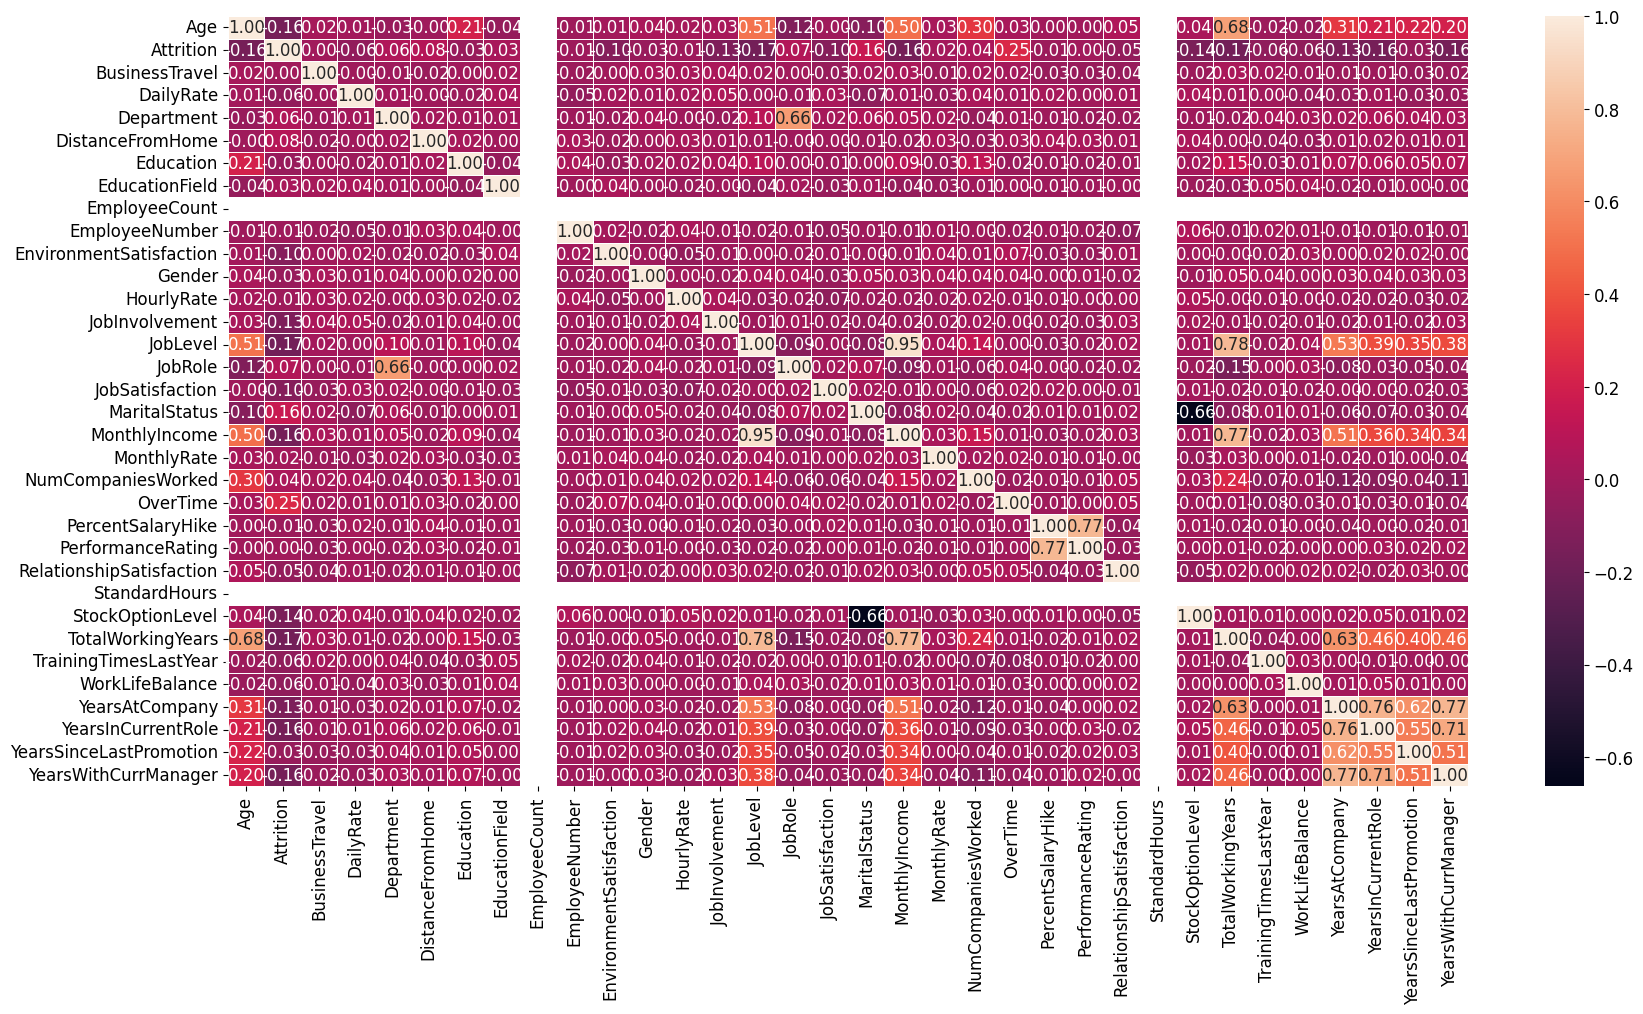

In [31]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix=numerical_df.corr()
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

-As we can see we have white lines in the correlation matrix indicates a lack of variation or a constant value in the corresponding variable. The column "EmployeeCount" and "StandardHours" don't provide useful information for correlation analysis qnd for our ML models because they don't change across our dataset. So, as the next step, we'll **drop** these columns.

-And we know that the column Over18 and EmployeeNumber are constant and don't change across our dataset so we'll drop these columns also:

In [32]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [33]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Let's see the correlation matrix again after dropping the columns:

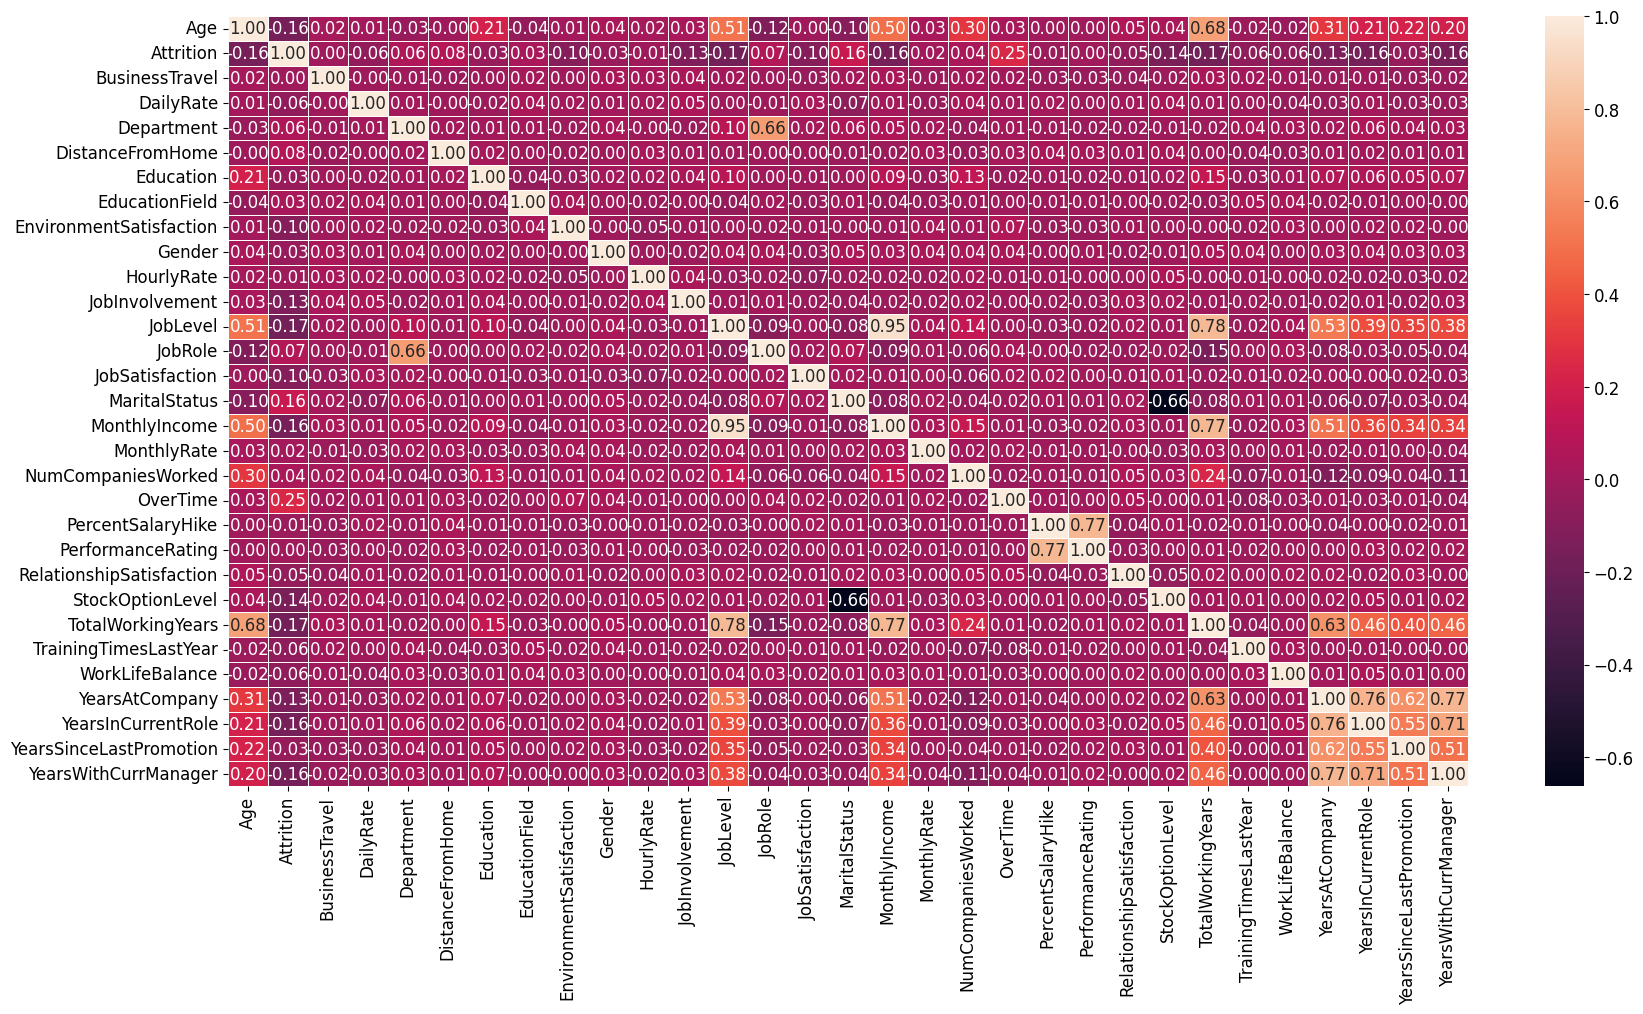

In [34]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix=numerical_df.corr()
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

The correlation values range from -1 to 1:


*   Positive values indicate a direct relationship (as one increases, the other also increases).

*   Negative values indicate an inverse relationship (as one increases, the other decreases).

*   Values close to 0 indicate a weak or no correlation.

↪ The most notable correlations with attrition are:

*   **OverTime (0.25)**: Moderate positive correlation, indicating that working overtime significantly increases ↗ attrition.

*   **Age (-0.16)**, **JobLevel (-0.17)**, **TotalWorkingYears (-0.17)**, **YearsInCurrentRole (-0.16)**, **YearsWithCurrManager (-0.16)**: Weak negative correlations, indicating that these factors tend to modify ↘ attrition.

*   **MaritalStatus (0.16)**: This feature shows a positive correlation with attrition. A correlation of 0.16 suggests a weak positive relationship.

*   Other features have very weak correlations with attrition.

# Before Resampling

## Splitting the data

Our target is the column "**Attrition**":



In [35]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition'].values

Now let's split our dataset into training and testing sets:

*   **20%** of the data for **testing** (X_test and y_test)
*   **80%** for **training** (X_train and y_train)



In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The `random_state=42` parameter ensures that each time I run the code with the same random_state, I get the same split of data into training and testing sets.

## Modeling

After splitting the data, I'm now ready to explore and evaluate various **supervised** machine learning models i'll start by **classification** models and then regression. I want to test all the models to see the differences and to learn more about each one:



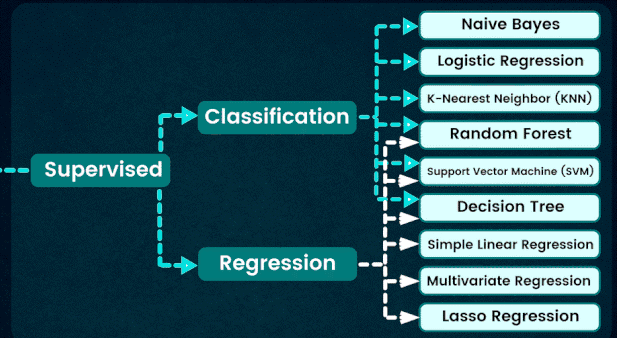

### Logistic Regression

We'll start by **Logistic Regression** Model:

Classification with logistic regression is obtained from the data values and sends them to the sigmoid function. Logistic regression included in the regression analysis used when the dependent variable is categorical value. A simple logistic regression model is a model for one independent variable X with a variable dichotomous Y. When the value of the variable Y is 1 indicates the existence of a characteristic, and Y is 0 indicates the absence of a characteristic. Logistic regression using the sigmoid function in its curve.

The equation of the sigmoid function model shown in the following formula:

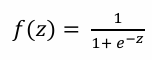

f(z) is the probability of the logistic regression model. The parameter z is defined in Formula:

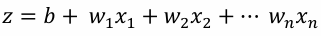.

Where w is the model’s learned weights, b is bias, and x is the feature values.

                     


In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score
prediction=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score -", accuracy_score(y_test , prediction))

Accuracy Score - 0.8537414965986394


**ROC AUC**

ROC (Receiver Operating Characteristic) curve is a graph showing the classification model's performance.
The graph shows the relationship between the False Positive Rate (FPR) on the X-axis and the True Positive
Rate (TPR) on the Y-axis. FPR and TPR are defined in the next Formulas:

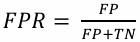   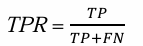

AUC (Area Under ROC Curve) measures the area under the ROC Curve. The area under the curve provides an overview of the overall measurement of the model's suitability.


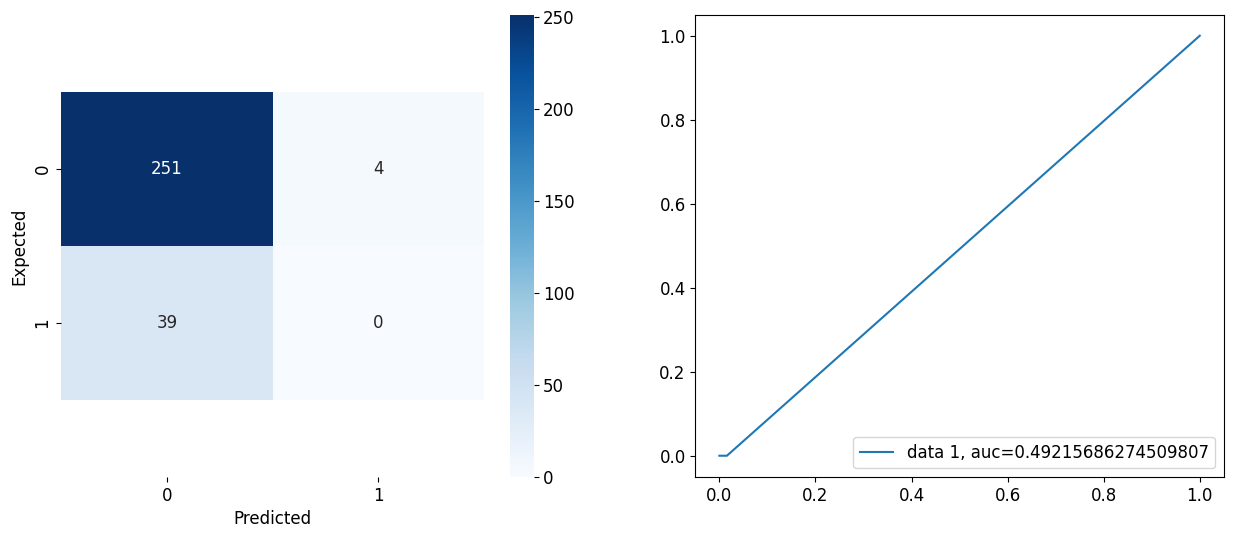

In [39]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

 Now we'll use `MinMaxScaler` to normalize feature values between 0 and 1, improving model accuracy by ensuring consistent feature scales:

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.14285714, 1.        , 0.17790531, ..., 0.05555556, 0.        ,
        0.        ],
       [0.        , 0.        , 0.13271162, ..., 0.        , 0.        ,
        0.        ],
       [0.26190476, 1.        , 0.82137733, ..., 0.11111111, 0.        ,
        0.11764706],
       ...,
       [0.0952381 , 0.5       , 0.82783357, ..., 0.        , 0.        ,
        0.        ],
       [0.26190476, 1.        , 0.91535151, ..., 0.16666667, 0.        ,
        0.17647059],
       [0.76190476, 1.        , 0.11621234, ..., 0.        , 0.        ,
        0.        ]])

We create a machine learning pipeline with MinMaxScaler for feature scaling and LogisticRegression for the model:

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression())

Let's print the steps of the pipeline to verify that the MinMaxScaler and LogisticRegression components have been correctly added:

In [42]:
#Pipeline steps:
print("Étapes du pipeline:")
for step_name, step_process in pipeline.steps:
    print(f"{step_name} : {step_process}")

Étapes du pipeline:
minmaxscaler : MinMaxScaler()
logisticregression : LogisticRegression()


Fit the pipeline to the training data (X_train and y_train)

In [43]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

Now we'll measure the time taken to fit the pipeline to the training data.
`start` records the start time, and `elapsed_time` records the end time.

In [44]:
import time
start=time.time()
pipeline.fit(X_train, y_train)
elapsed_time=time.time()

Use the fitted pipeline to make predictions on the test data:

In [45]:
predicted_data = pipeline.predict(X_test)

In [46]:
start

1722337658.3135142

In [47]:
elapsed_time

1722337658.3861835

➡ The fitting process took approximately 0.0297578 seconds which is a very fast training time.

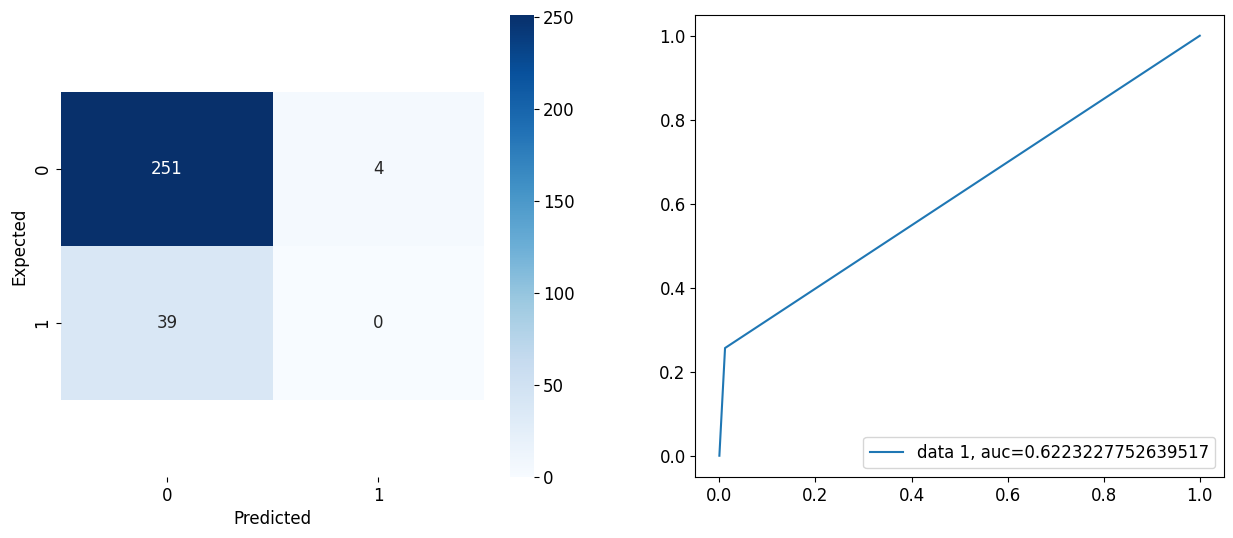

In [48]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  predicted_data)
auc = roc_auc_score(y_test, predicted_data)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Now we'll check the new accuracy:

In [49]:
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, predicted_data)
print(f"Accuracy: {accuracy}")

Accuracy: 0.891156462585034


## Test

In [50]:
sample_employee_data = {
    'Age': 20,
    'BusinessTravel': 'Travel_Rarely',
    'DailyRate': 1100,
    'Department': 'Research & Development',
    'DistanceFromHome': 2,
    'Education': 3,
    'EducationField': 'Life Sciences',
    'EnvironmentSatisfaction': 4,
    'Gender': 'Male',
    'HourlyRate': 65,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 'Sales Executive',
    'JobSatisfaction': 3,
    'MaritalStatus': 'Married',
    'MonthlyIncome': 6000,
    'MonthlyRate': 20000,
    'NumCompaniesWorked': 2,
    'OverTime': 'Yes',
    'PercentSalaryHike': 12,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 2,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 10,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 3,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2
}

In [51]:
employee_df = pd.DataFrame([sample_employee_data])

employee_df['OverTime'] = employee_df['OverTime'].map({'No': 0, 'Yes': 1})
employee_df['Gender'] = employee_df['Gender'].map({'Male': 0, 'Female': 1})

for column in encoding_cols:
    employee_df[column] = label_encoders[column].transform(employee_df[column])

employee_df = employee_df[X.columns]

employee_prediction = pipeline.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = pipeline.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])


The employee is predicted to stay.
Probability of quitting: 0.23382798009425135


### Decision Tree

*   Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
*   In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
*   The decisions or the test are performed on the basis of features of the given dataset.
*   It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
*   In order to build a tree, we use the **CART** algorithm, which stands for **Classification and Regression Tree algorithm**.
*   A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
*   Below diagram explains the general structure of a decision tree:

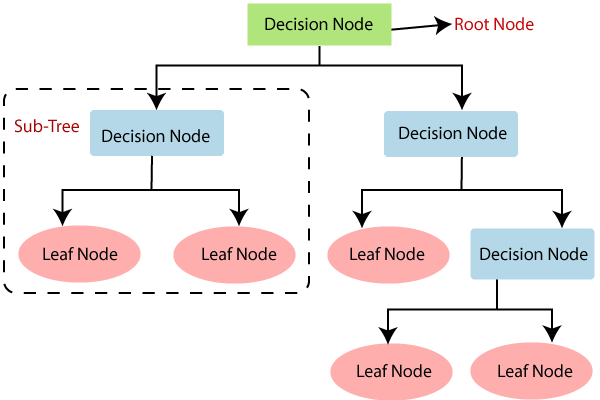

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
        plt.title('Confusion Matrix (Train)')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual labels')
        plt.show()

    elif not train:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
        plt.title('Confusion Matrix (Test)')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual labels')
        plt.show()

Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    978.0  198.0       1.0     1176.0        1176.0
_______________________________________________
Confusion Matrix: 
 [[978   0]
 [  0 198]]



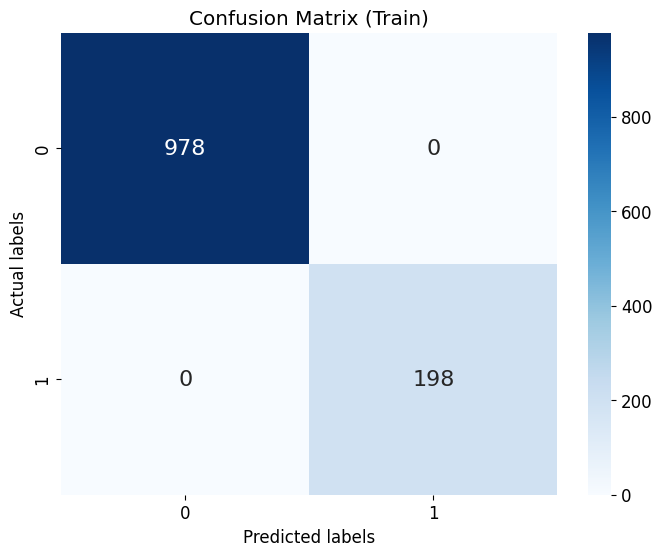

Test Result:

Accuracy Score: 79.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.882812   0.236842   0.79932    0.559827      0.797123
recall       0.886275   0.230769   0.79932    0.558522      0.799320
f1-score     0.884540   0.233766   0.79932    0.559153      0.798213
support    255.000000  39.000000   0.79932  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[226  29]
 [ 30   9]]



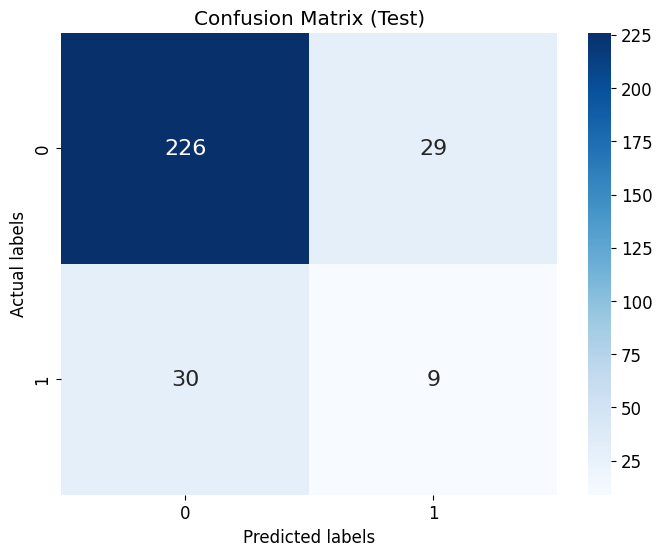

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

## Test

In [54]:
employee_prediction = tree_clf.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = tree_clf.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])

probability_of_staying = employee_proba[0][0]
print("Probability of staying:", probability_of_staying)

The employee is predicted to quit.
Probability of quitting: 1.0
Probability of staying: 0.0


### Random Forest

Random Forest is an ensemble learning method, meaning it combines the predictions of multiple models to improve overall performance. Specifically, it is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.

Bagging is a technique used to improve the stability and accuracy of machine learning algorithms. It involves creating multiple subsets of the original dataset through random sampling with replacement (bootstrap samples). Each subset is used to train a separate decision tree.

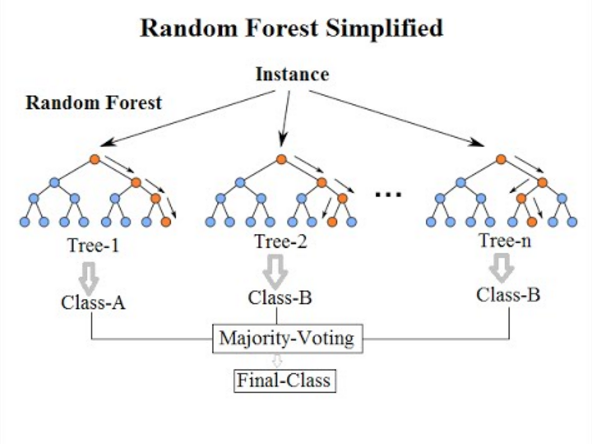

Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    978.0  198.0       1.0     1176.0        1176.0
_______________________________________________
Confusion Matrix: 
 [[978   0]
 [  0 198]]



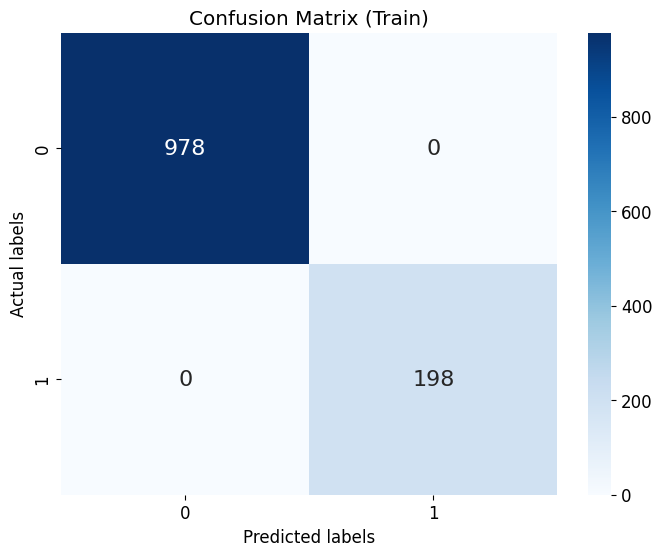

Test Result:

Accuracy Score: 88.10%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision    0.87931   1.000000  0.880952    0.939655      0.895320
recall       1.00000   0.102564  0.880952    0.551282      0.880952
f1-score     0.93578   0.186047  0.880952    0.560913      0.836325
support    255.00000  39.000000  0.880952  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[255   0]
 [ 35   4]]



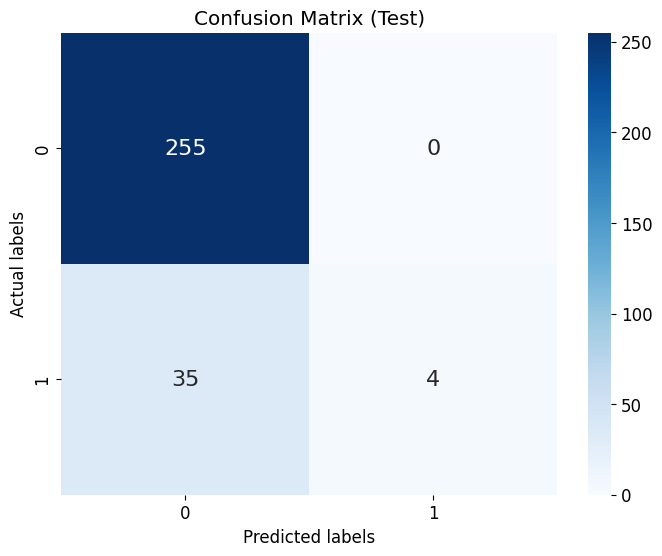

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

## Test

In [56]:
employee_prediction = rf_clf.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = rf_clf.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])

probability_of_staying = employee_proba[0][0]
print("Probability of staying:", probability_of_staying)

The employee is predicted to stay.
Probability of quitting: 0.14
Probability of staying: 0.86


### SVM (Support Vector Machine)
Support Vector Machines (SVM) are supervised machine learning models primarily used for classification, though they can also be applied to regression tasks. The goal of SVMs is to find the hyperplane that best separates the data into distinct classes in a high-dimensional space. SVMs are linear separators, meaning the boundary that separates the classes is a straight line.

The optimal case is an hyperplane (the boundary) that represents the largest margin between the two classes to minimize sensitivity to noise. The margin refers to the maximum width of the space parallel to the hyperplane that contains no data points. The chosen boundary should maximize its distance from the closest data points to the hyperplane.

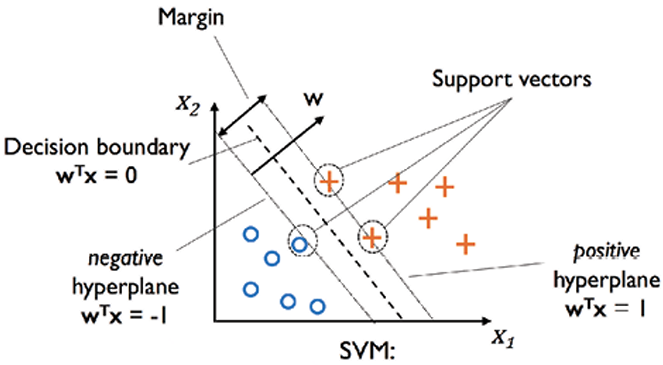

A larger margin helps improve the model's generalization by making it less sensitive to noise and overfitting.
**Thus, the goal is to find a hyperplane that maximizes this margin.**

In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [58]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.867


Train Result:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 83.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy    macro avg  weighted avg
precision    0.831633    0.0  0.831633     0.415816      0.691613
recall       1.000000    0.0  0.831633     0.500000      0.831633
f1-score     0.908078    0.0  0.831633     0.454039      0.755187
support    978.000000  198.0  0.831633  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[978   0]
 [198   0]]



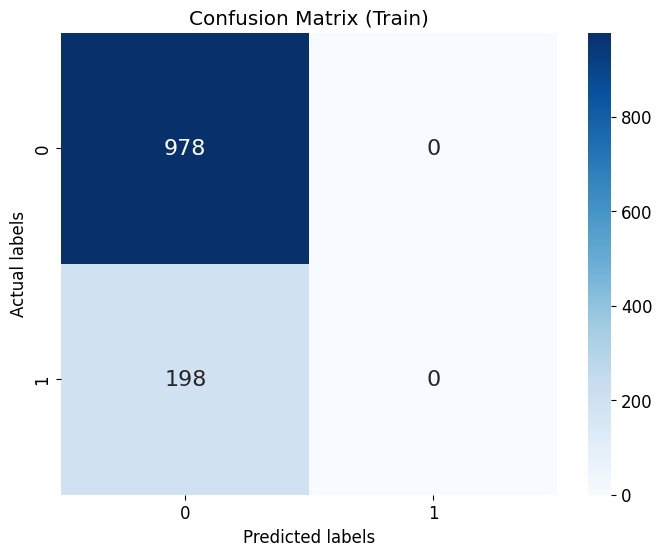

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:

Accuracy Score: 86.73%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.867347   0.0  0.867347    0.433673      0.752291
recall       1.000000   0.0  0.867347    0.500000      0.867347
f1-score     0.928962   0.0  0.867347    0.464481      0.805732
support    255.000000  39.0  0.867347  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[255   0]
 [ 39   0]]



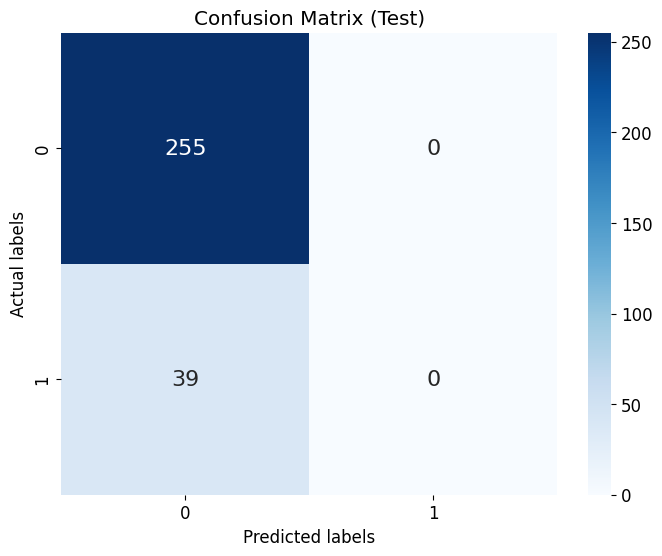

In [59]:
print_score(svc, X_train, y_train, X_test, y_test, train=True)
print_score(svc, X_train, y_train, X_test, y_test, train=False)

### XGBoost Classifier

XGBoost, which stands for eXtreme Gradient Boosting, is a powerful machine learning algorithm based on gradient boosting that combines the predictions of multiple decision trees to produce a strong model. Its efficiency and performance come from its principles of boosting, gradient boosting, tree pruning, regularization, sparsity awareness, parallelization, and handling of missing values. These features make XGBoost a popular choice for both competitions and real-world applications.

Here are its key principles:

* Boosting: Combines multiple weak learners (decision trees) sequentially to create a strong learner.

* Gradient Boosting: Optimizes a loss function iteratively by adding new models to correct errors made by existing ones.

* Tree Pruning: Controls tree depth to prevent overfitting and prunes unnecessary splits.

* Regularization: Uses L1 (Lasso) and L2 (Ridge) regularization to penalize complex models and avoid overfitting.

* Sparsity Awareness: Efficiently handles sparse data and missing values.

* Weighted Quantile Sketch: Efficiently computes data splits, even for unbalanced data.

* Parallelization: Utilizes multiple CPU cores for faster tree building.

* Handling Missing Values: Automatically learns the best way to handle missing values during training.

XGBoost Classifier accuracy: 0.871
Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    978.0  198.0       1.0     1176.0        1176.0
_______________________________________________
Confusion Matrix: 
 [[978   0]
 [  0 198]]



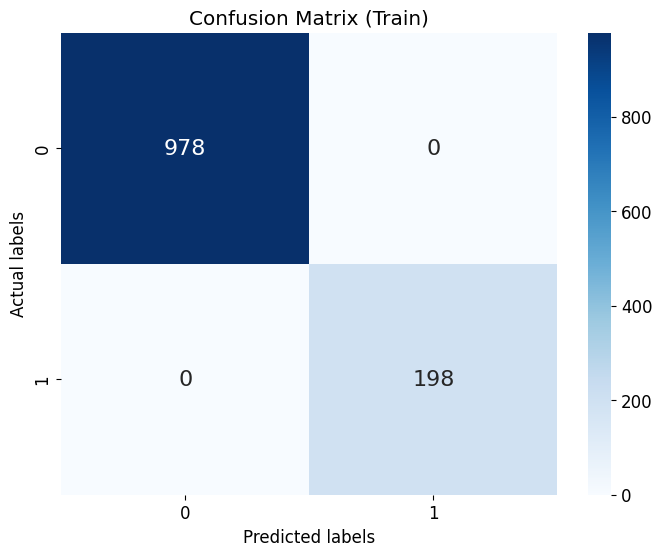

Test Result:

Accuracy Score: 87.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.897436   0.523810  0.870748    0.710623      0.847873
recall       0.960784   0.282051  0.870748    0.621418      0.870748
f1-score     0.928030   0.366667  0.870748    0.647348      0.853564
support    255.000000  39.000000  0.870748  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[245  10]
 [ 28  11]]



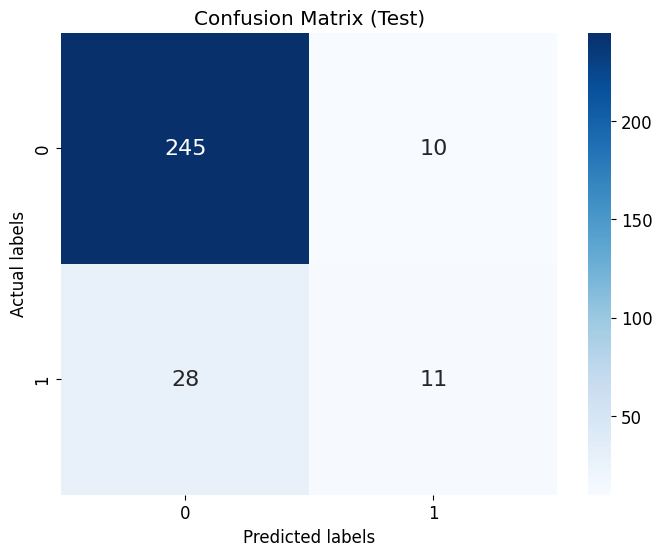

In [60]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
print('XGBoost Classifier accuracy: {:.3f}'.format(accuracy_score(y_test, xgb.predict(X_test))))
print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)


# After Resampling

**Random oversampling**:

Random oversampling is a straightforward technique that duplicates minority class examples at random to balance class distributions.

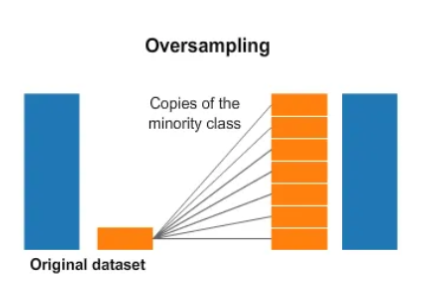

The goal of random oversampling is to balance the class distribution by randomly duplicating examples from the minority class (oversampling) until the class distribution is more balanced.

In [61]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition'].values

In [62]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state = 42)
X_over, y_over = rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [63]:
print("Dataset after resampling:")
pd.DataFrame(X_over).head()


Dataset after resampling:


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,1,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,0,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,0,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,1,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,0,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## Splitting the data

In [64]:
#After resampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 30)
(1972,)
(494, 30)
(494,)


## Modeling

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
prediction=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score -", accuracy_score(y_test , prediction))

Accuracy Score - 0.6133603238866396


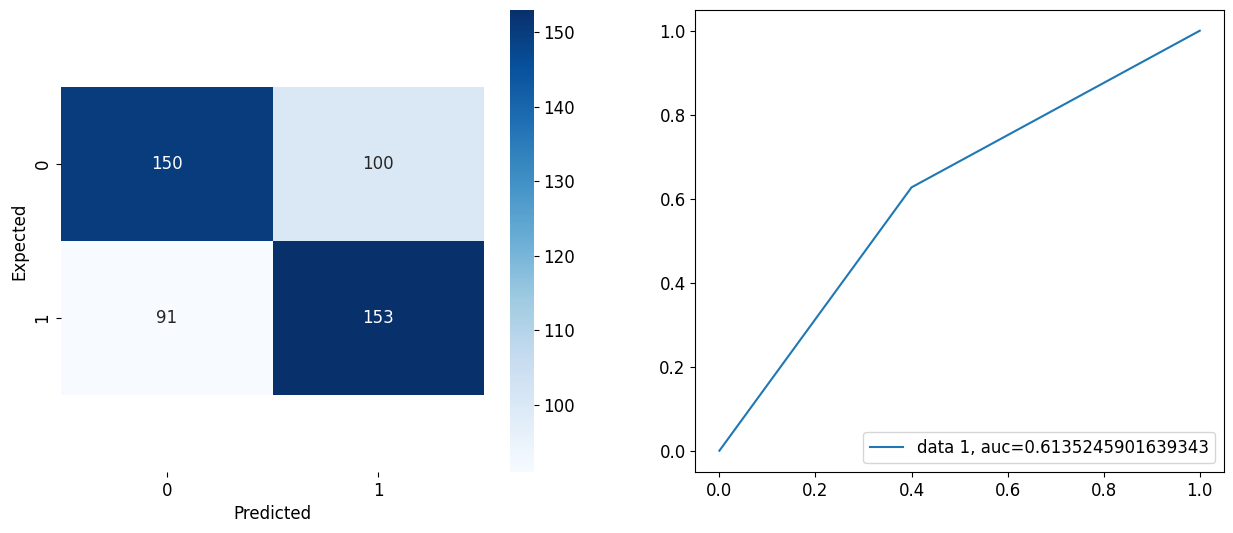

In [69]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.19047619, 1.        , 0.26413744, ..., 0.        , 0.        ,
        0.        ],
       [0.64285714, 1.        , 0.9634932 , ..., 0.05555556, 0.06666667,
        0.11764706],
       [0.71428571, 1.        , 0.72011453, ..., 0.11111111, 0.46666667,
        0.35294118],
       ...,
       [0.4047619 , 1.        , 0.46385111, ..., 0.5       , 0.4       ,
        0.47058824],
       [0.54761905, 1.        , 0.24695777, ..., 0.11111111, 0.06666667,
        0.11764706],
       [0.0952381 , 0.5       , 0.82605583, ..., 0.        , 0.        ,
        0.        ]])

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression())

In [72]:
# Afficher les étapes du pipeline
print("Étapes du pipeline:")
for step_name, step_process in pipeline.steps:
    print(f"{step_name} : {step_process}")

Étapes du pipeline:
minmaxscaler : MinMaxScaler()
logisticregression : LogisticRegression()


In [73]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [74]:
import time
start=time.time()
pipeline.fit(X_train, y_train)
elapsed_time=time.time()

In [75]:
predicted_data = pipeline.predict(X_test)

In [76]:
start

1722337675.9267855

In [77]:
elapsed_time

1722337676.1277497

In [78]:
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test, predicted_data)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7489878542510121


### Test

In [79]:
sample_employee_data = {
    'Age': 20,
    'BusinessTravel': 'Travel_Rarely',
    'DailyRate': 1100,
    'Department': 'Research & Development',
    'DistanceFromHome': 2,
    'Education': 3,
    'EducationField': 'Life Sciences',
    'EnvironmentSatisfaction': 4,
    'Gender': 'Male',
    'HourlyRate': 65,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 'Sales Executive',
    'JobSatisfaction': 3,
    'MaritalStatus': 'Married',
    'MonthlyIncome': 6000,
    'MonthlyRate': 20000,
    'NumCompaniesWorked': 2,
    'OverTime': 'Yes',
    'PercentSalaryHike': 12,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 2,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 10,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 3,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2
}

In [80]:
employee_df = pd.DataFrame([sample_employee_data])

employee_df['OverTime'] = employee_df['OverTime'].map({'No': 0, 'Yes': 1})
employee_df['Gender'] = employee_df['Gender'].map({'Male': 0, 'Female': 1})

for column in encoding_cols:
    employee_df[column] = label_encoders[column].transform(employee_df[column])

employee_df = employee_df[X.columns]

employee_prediction = pipeline.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = pipeline.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])


The employee is predicted to quit.
Probability of quitting: 0.5026092858533971


### Decision Tree

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
        plt.title('Confusion Matrix (Train)')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual labels')
        plt.show()

    elif not train:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
        plt.title('Confusion Matrix (Test)')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual labels')
        plt.show()

Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    983.0  989.0       1.0     1972.0        1972.0
_______________________________________________
Confusion Matrix: 
 [[983   0]
 [  0 989]]



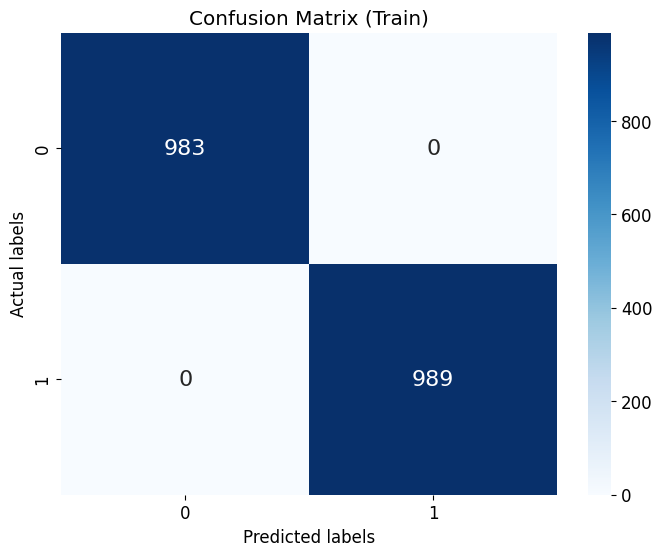

Test Result:

Accuracy Score: 89.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.985437    0.836806  0.898785    0.911121      0.912024
recall       0.812000    0.987705  0.898785    0.899852      0.898785
f1-score     0.890351    0.906015  0.898785    0.898183      0.898088
support    250.000000  244.000000  0.898785  494.000000    494.000000
_______________________________________________
Confusion Matrix: 
 [[203  47]
 [  3 241]]



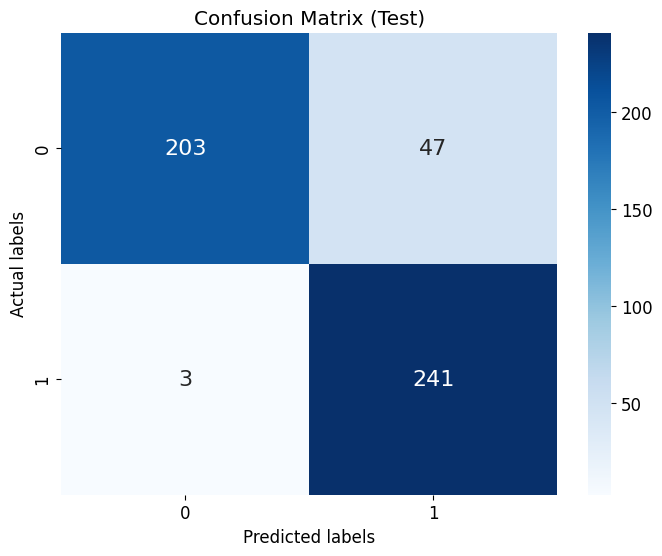

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [83]:
employee_prediction = tree_clf.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = tree_clf.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])

probability_of_staying = employee_proba[0][0]
print("Probability of staying:", probability_of_staying)

The employee is predicted to stay.
Probability of quitting: 0.0
Probability of staying: 1.0


### Random Forest

Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    983.0  989.0       1.0     1972.0        1972.0
_______________________________________________
Confusion Matrix: 
 [[983   0]
 [  0 989]]



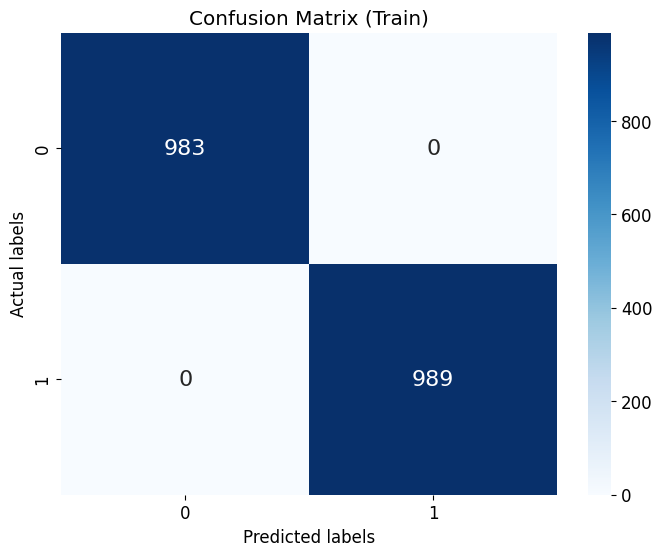

Test Result:

Accuracy Score: 95.55%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.967213    0.944000  0.955466    0.955607      0.955748
recall       0.944000    0.967213  0.955466    0.955607      0.955466
f1-score     0.955466    0.955466  0.955466    0.955466      0.955466
support    250.000000  244.000000  0.955466  494.000000    494.000000
_______________________________________________
Confusion Matrix: 
 [[236  14]
 [  8 236]]



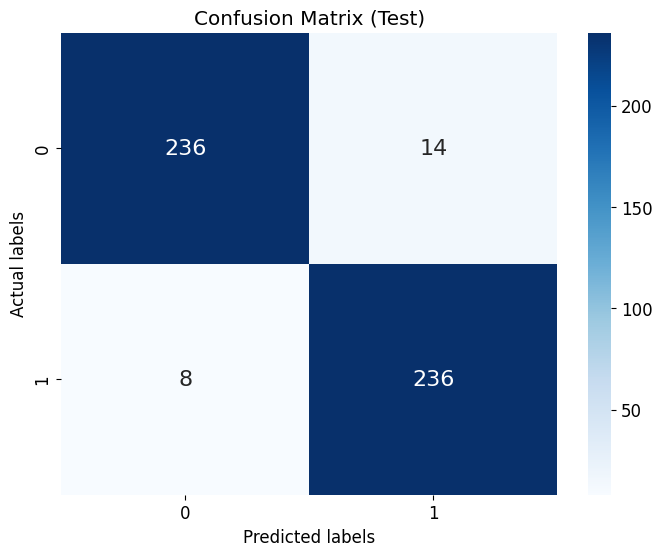

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

In [85]:
employee_prediction = rf_clf.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = rf_clf.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])

probability_of_staying = employee_proba[0][0]
print("Probability of staying:", probability_of_staying)

The employee is predicted to stay.
Probability of quitting: 0.24
Probability of staying: 0.76


### SVM (Support Vector Machine)

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [87]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.599


Train Result:

Accuracy Score: 60.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.626566    0.588586  0.603955     0.607576      0.607518
recall       0.508647    0.698686  0.603955     0.603666      0.603955
f1-score     0.561482    0.638927  0.603955     0.600205      0.600323
support    983.000000  989.000000  0.603955  1972.000000   1972.000000
_______________________________________________
Confusion Matrix: 
 [[500 483]
 [298 691]]



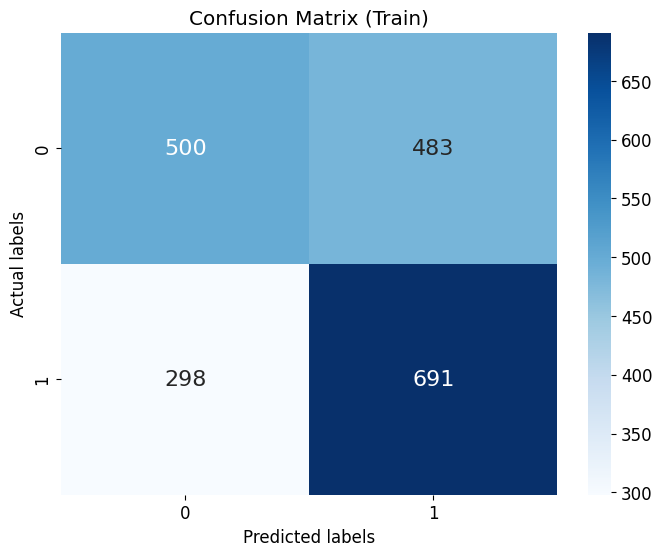

Test Result:

Accuracy Score: 59.92%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.625000    0.580420   0.59919    0.602710      0.602981
recall       0.520000    0.680328   0.59919    0.600164      0.599190
f1-score     0.567686    0.626415   0.59919    0.597050      0.596694
support    250.000000  244.000000   0.59919  494.000000    494.000000
_______________________________________________
Confusion Matrix: 
 [[130 120]
 [ 78 166]]



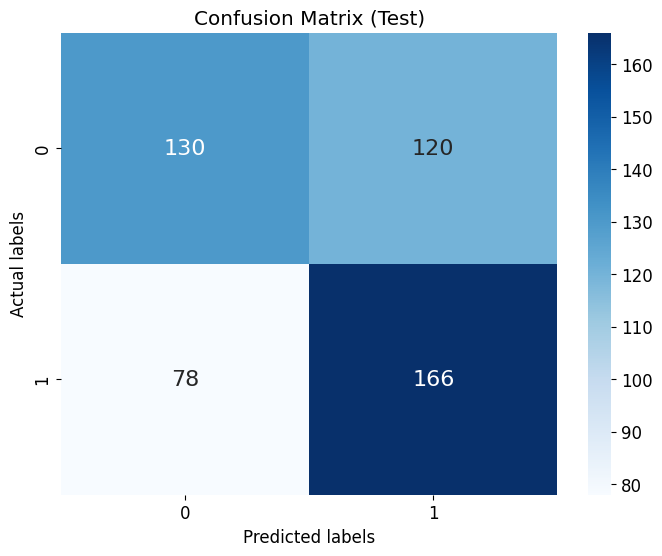

In [88]:
print_score(svc, X_train, y_train, X_test, y_test, train=True)
print_score(svc, X_train, y_train, X_test, y_test, train=False)

### XGBoost Classifier

XGBoost Classifier accuracy: 0.957
Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    983.0  989.0       1.0     1972.0        1972.0
_______________________________________________
Confusion Matrix: 
 [[983   0]
 [  0 989]]



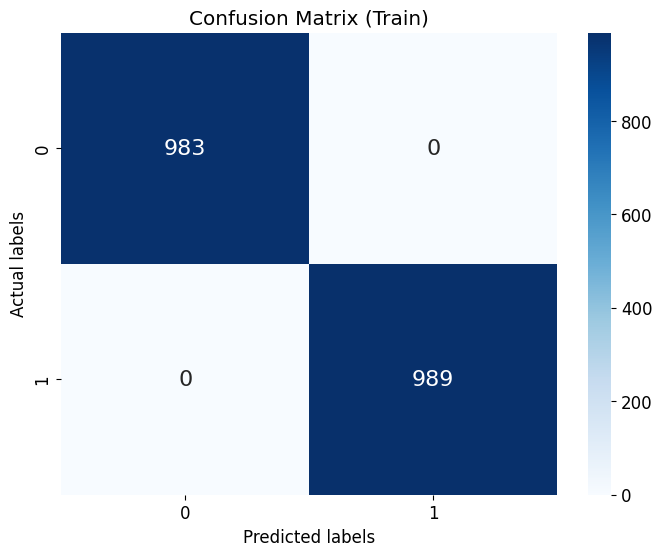

Test Result:

Accuracy Score: 95.75%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.975104    0.940711   0.95749    0.957908      0.958116
recall       0.940000    0.975410   0.95749    0.957705      0.957490
f1-score     0.957230    0.957746   0.95749    0.957488      0.957485
support    250.000000  244.000000   0.95749  494.000000    494.000000
_______________________________________________
Confusion Matrix: 
 [[235  15]
 [  6 238]]



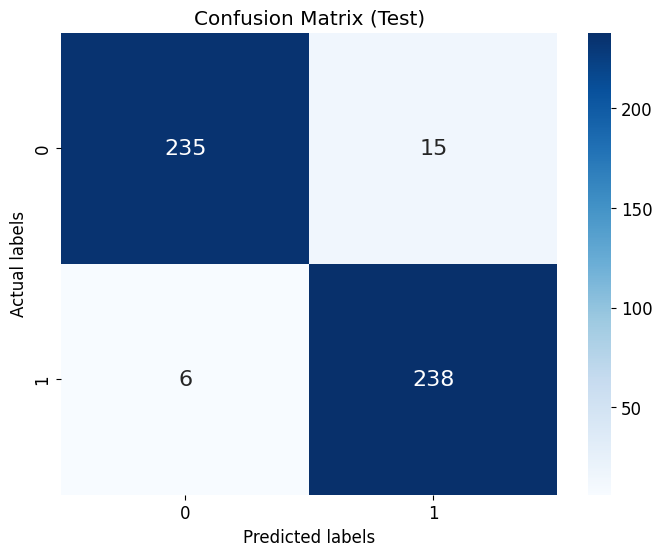

In [89]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
print('XGBoost Classifier accuracy: {:.3f}'.format(accuracy_score(y_test, xgb.predict(X_test))))
print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)


#  

**Interpretation:**

1. Logistic Regression

Before resampling: **0.891 accuracy**

After resampling: 0.748 accuracy

Impact:

Logistic regression is a linear model, which means it tries to find a linear decision boundary between the classes. It is generally sensitive to imbalanced datasets because it directly tries to maximize the log-likelihood, which can be affected by the imbalance.

After resampling, the accuracy decreased. **This could be because the resampling introduced noise or redundant samples**, which **can negatively affect the linear decision** boundary in logistic regression.

2. Decision Tree

Before resampling: 0.7993 accuracy

After resampling: **0.8988 accuracy**

Impact:

Decision trees are **more flexible and can handle imbalanced data better than linear models** because they **partition the data into smaller and more homogeneous subsets**.
After resampling, the accuracy improved. This is because resampling helps the decision tree to learn from a more balanced dataset, which can lead to better performance, especially in identifying the minority class.

3. Random Forest

Before resampling: 0.874 accuracy

After resampling: **0.9514 accuracy**

Impact:

Random forests, being an ensemble method of decision trees, **can handle imbalanced data to some extent by averaging the results of multiple trees**.
After resampling, the accuracy significantly improved. The random forest benefited from the resampled data as it allowed the individual trees to have a more balanced view of the classes, leading to a more robust ensemble model. The diverse and balanced training samples for each tree help in better generalization and improved performance.


4. SVM

Before resampling: **0.867 accuracy**

After resampling: 0.599 accuracy

Impact:

SVMs are **sensitive to imbalanced datasets because they try to find the optimal hyperplane that maximizes the margin between classes**. The decrease in accuracy after resampling suggests that the model became less effective due to potential overfitting or the introduction of noise. **SVMs are more sensitive to the quality and distribution of the data**, and resampling might have negatively impacted the model's ability to generalize.

5. XGBoost Classifier

Before resampling: 0.871 accuracy

After resampling: **0.957 accuracy**

Impact:

The significant improvement in accuracy after resampling indicates that XGBoost effectively utilized the balanced data to improve its model. Resampling provided a more balanced representation of classes, allowing XGBoost to learn better from the minority class and improve its performance. **Boosting algorithms, like XGBoost, are designed to reduce bias and variance by combining multiple weak learners**, and a balanced dataset can enhance this process, leading to better generalization and overall performance.


# Feature Selection

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Recursive Feature Elimination (RFE)
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=8)
rfe = rfe.fit(X, y)

# Get the indices of the selected features
selected_indices = rfe.support_

# Get the column names corresponding to the selected indices
selected_columns = X.columns[selected_indices]

# Print the names of the selected columns
print("Selected Columns:")
for col in selected_columns:
    print(col)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Columns:
Department
EnvironmentSatisfaction
Gender
JobInvolvement
JobLevel
JobSatisfaction
MaritalStatus
OverTime


<Figure size 2000x2000 with 0 Axes>

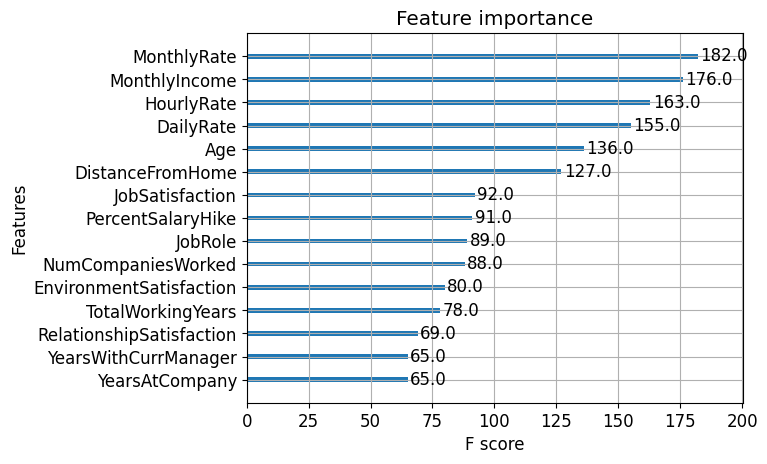

In [95]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

plt.figure(figsize = (20, 20))
xgb.plot_importance(xgb_classifier, max_num_features=15)
plt.show()

In [96]:
cols = [
    'MonthlyRate',
    'MonthlyIncome',
    'HourlyRate',
    'DailyRate',
    'Age',
    'DistanceFromHome',
    'JobSatisfaction',
    'PercentSalaryHike',
    'JobRole',
    'NumCompaniesWorked',
    'EnvironmentSatisfaction',
    'TotalWorkingYears',
    'RelationshipSatisfaction',
    'YearsWithCurrManager',
    'YearsAtCompany'
]


X = df[cols]
y = df['Attrition'].values

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1470, 15)
y shape: (1470,)


## Splitting the data

Now let's split our dataset into training and testing sets:

*   **20%** of the data for **testing** (X_test and y_test)
*   **80%** for **training** (X_train and y_train)



In [97]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

The `random_state=42` parameter ensures that each time I run the code with the same random_state, I get the same split of data into training and testing sets.

## Modeling

### Logistic Regression

We'll start by **Logistic Regression** Model:

Classification with logistic regression is obtained from the data values and sends them to the sigmoid function. Logistic regression included in the regression analysis used when the dependent variable is categorical value. A simple logistic regression model is a model for one independent variable X with a variable dichotomous Y. When the value of the variable Y is 1 indicates the existence of a characteristic, and Y is 0 indicates the absence of a characteristic. Logistic regression using the sigmoid function in its curve.

The equation of the sigmoid function model shown in the following formula:

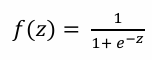

f(z) is the probability of the logistic regression model. The parameter z is defined in Formula:

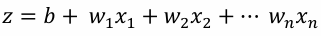.

Where w is the model’s learned weights, b is bias, and x is the feature values.

                     


In [98]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score
prediction=logreg.predict(X_test1)
cnf_matrix = confusion_matrix(y_test1,prediction)
print("Accuracy Score -", accuracy_score(y_test1 , prediction))

Accuracy Score - 0.8673469387755102


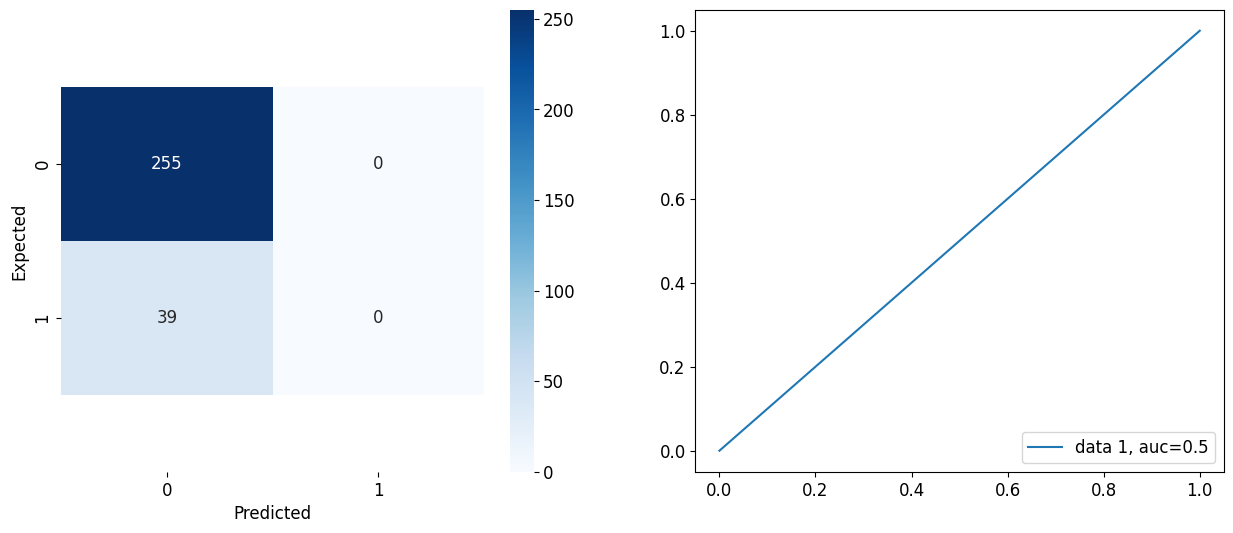

In [100]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test1)[::,1]
fpr, tpr, _ = roc_curve(y_test1,  prediction)
auc = roc_auc_score(y_test1, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

 Now we'll use `MinMaxScaler` to normalize feature values between 0 and 1, improving model accuracy by ensuring consistent feature scales:

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train1)
X_train_scaled

array([[0.31889179, 0.06777251, 0.38571429, ..., 0.33333333, 0.        ,
        0.025     ],
       [0.45769926, 0.00221169, 0.61428571, ..., 1.        , 0.        ,
        0.        ],
       [0.34683798, 0.31184834, 0.21428571, ..., 1.        , 0.11764706,
        0.075     ],
       ...,
       [0.08548484, 0.09710374, 0.25714286, ..., 0.33333333, 0.        ,
        0.        ],
       [0.86669344, 0.15882043, 0.22857143, ..., 0.        , 0.17647059,
        0.1       ],
       [0.6996587 , 0.96482359, 0.41428571, ..., 0.66666667, 0.        ,
        0.025     ]])

We create a machine learning pipeline with MinMaxScaler for feature scaling and LogisticRegression for the model:

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression())

Let's print the steps of the pipeline to verify that the MinMaxScaler and LogisticRegression components have been correctly added:

In [103]:
# Afficher les étapes du pipeline
print("Étapes du pipeline:")
for step_name, step_process in pipeline.steps:
    print(f"{step_name} : {step_process}")

Étapes du pipeline:
minmaxscaler : MinMaxScaler()
logisticregression : LogisticRegression()


Fit the pipeline to the training data (X_train1 and y_train1)

In [104]:
pipeline.fit(X_train1, y_train1)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

Now we'll measure the time taken to fit the pipeline to the training data.
`start` records the start time, and `elapsed_time` records the end time.

In [105]:
import time
start=time.time()
pipeline.fit(X_train1, y_train1)
elapsed_time=time.time()

Use the fitted pipeline to make predictions on the test data:

In [106]:
predicted_data = pipeline.predict(X_test1)

In [107]:
start

1722337721.3151498

In [108]:
elapsed_time

1722337721.359948

➡ The fitting process took approximately 0.0240058 seconds which is a very fast training time.

Now we'll check the new accuracy:

In [109]:
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(y_test1, predicted_data)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8741496598639455


## Test

In [110]:
sample_employee_data = {
    'Age': 20,
    'BusinessTravel': 'Travel_Rarely',
    'DailyRate': 1100,
    'Department': 'Research & Development',
    'DistanceFromHome': 2,
    'Education': 3,
    'EducationField': 'Life Sciences',
    'EnvironmentSatisfaction': 4,
    'Gender': 'Male',
    'HourlyRate': 65,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobRole': 'Sales Executive',
    'JobSatisfaction': 3,
    'MaritalStatus': 'Married',
    'MonthlyIncome': 6000,
    'MonthlyRate': 20000,
    'NumCompaniesWorked': 2,
    'OverTime': 'Yes',
    'PercentSalaryHike': 12,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 2,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 10,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 5,
    'YearsInCurrentRole': 3,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2
}

In [111]:
employee_df = pd.DataFrame([sample_employee_data])

employee_df['OverTime'] = employee_df['OverTime'].map({'No': 0, 'Yes': 1})
employee_df['Gender'] = employee_df['Gender'].map({'Male': 0, 'Female': 1})

for column in encoding_cols:
    employee_df[column] = label_encoders[column].transform(employee_df[column])

employee_df = employee_df[X.columns]

employee_prediction = pipeline.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = pipeline.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])


The employee is predicted to stay.
Probability of quitting: 0.1808448342855377


### Decision Tree

Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    978.0  198.0       1.0     1176.0        1176.0
_______________________________________________
Confusion Matrix: 
 [[978   0]
 [  0 198]]



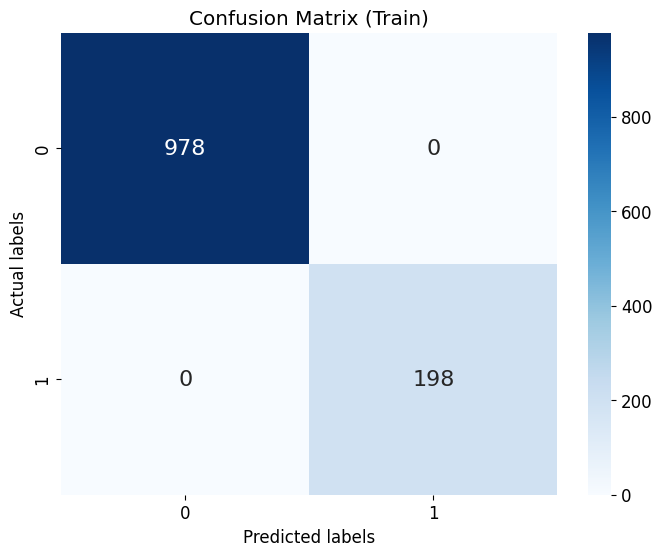

Test Result:

Accuracy Score: 74.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.871901   0.153846  0.744898    0.512873      0.776649
recall       0.827451   0.205128  0.744898    0.516290      0.744898
f1-score     0.849095   0.175824  0.744898    0.512459      0.759783
support    255.000000  39.000000  0.744898  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[211  44]
 [ 31   8]]



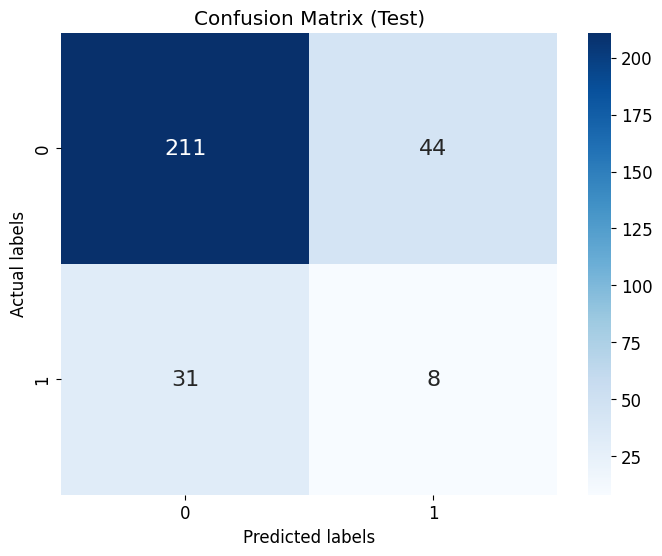

In [112]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train1, y_train1)

print_score(tree_clf, X_train1, y_train1, X_test1, y_test1, train=True)
print_score(tree_clf, X_train1, y_train1, X_test1, y_test1, train=False)

## Test

In [113]:
employee_prediction = tree_clf.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = tree_clf.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])

probability_of_staying = employee_proba[0][0]
print("Probability of staying:", probability_of_staying)

The employee is predicted to quit.
Probability of quitting: 1.0
Probability of staying: 0.0


### Random Forest

Random Forest is an ensemble learning method, meaning it combines the predictions of multiple models to improve overall performance. Specifically, it is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging.

Bagging is a technique used to improve the stability and accuracy of machine learning algorithms. It involves creating multiple subsets of the original dataset through random sampling with replacement (bootstrap samples). Each subset is used to train a separate decision tree.

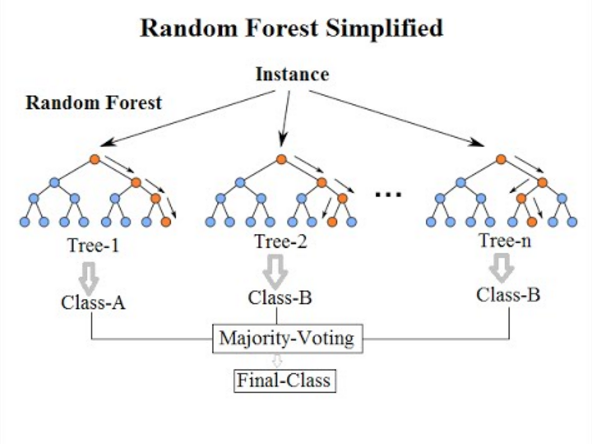

Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    978.0  198.0       1.0     1176.0        1176.0
_______________________________________________
Confusion Matrix: 
 [[978   0]
 [  0 198]]



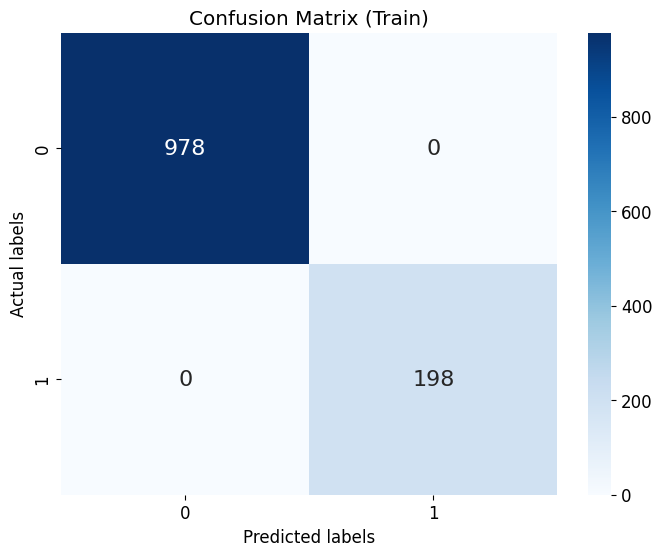

Test Result:

Accuracy Score: 86.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.874564   0.428571  0.863946    0.651568      0.815402
recall       0.984314   0.076923  0.863946    0.530618      0.863946
f1-score     0.926199   0.130435  0.863946    0.528317      0.820639
support    255.000000  39.000000  0.863946  294.000000    294.000000
_______________________________________________
Confusion Matrix: 
 [[251   4]
 [ 36   3]]



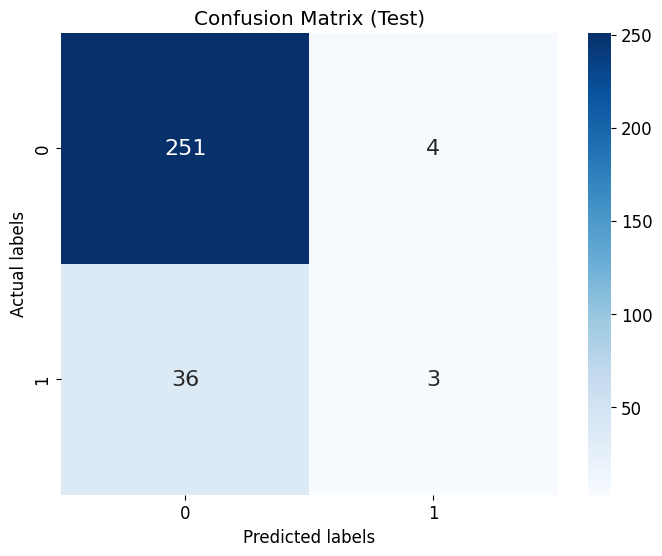

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train1, y_train1)

print_score(rf_clf, X_train1, y_train1, X_test1, y_test1, train=True)
print_score(rf_clf, X_train1, y_train1, X_test1, y_test1, train=False)

## Test

In [115]:
employee_prediction = rf_clf.predict(employee_df)

if employee_prediction[0] == 1:
    print("The employee is predicted to quit.")
else:
    print("The employee is predicted to stay.")

employee_proba = rf_clf.predict_proba(employee_df)
print("Probability of quitting:", employee_proba[0][1])

probability_of_staying = employee_proba[0][0]
print("Probability of staying:", probability_of_staying)

The employee is predicted to stay.
Probability of quitting: 0.18
Probability of staying: 0.82


### XGBoost

In [116]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state = 42)
X_over, y_over = rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [117]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

XGBoost Classifier accuracy: 0.945
Train Result:

Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    983.0  989.0       1.0     1972.0        1972.0
_______________________________________________
Confusion Matrix: 
 [[983   0]
 [  0 989]]



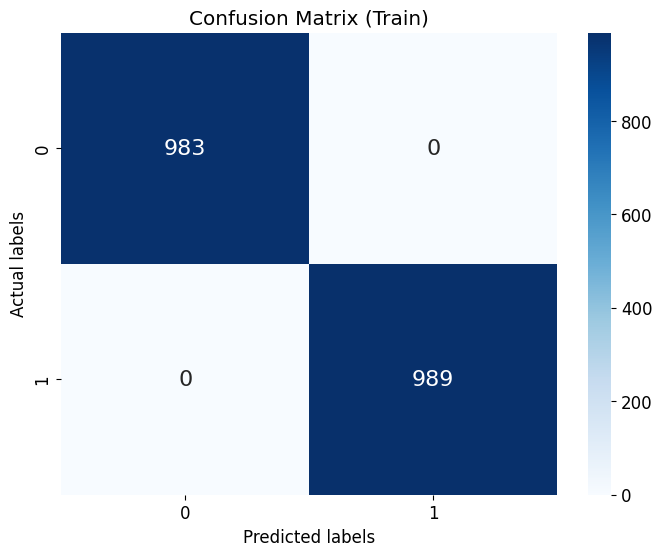

Test Result:

Accuracy Score: 94.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.966527    0.925490  0.945344    0.946009      0.946258
recall       0.924000    0.967213  0.945344    0.945607      0.945344
f1-score     0.944785    0.945892  0.945344    0.945339      0.945332
support    250.000000  244.000000  0.945344  494.000000    494.000000
_______________________________________________
Confusion Matrix: 
 [[231  19]
 [  8 236]]



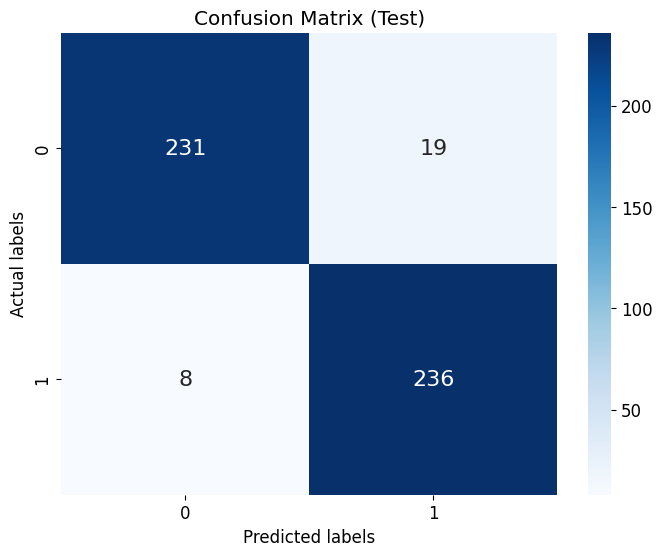

In [118]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train1, y_train1)
print('XGBoost Classifier accuracy: {:.3f}'.format(accuracy_score(y_test1, xgb.predict(X_test1))))
print_score(xgb, X_train1, y_train1, X_test1, y_test1, train=True)
print_score(xgb, X_train1, y_train1, X_test1, y_test1, train=False)

In [120]:
import pickle
with open('employee_attrition_xgb.pkl', 'wb') as model_file:
    pickle.dump(xgb, model_file)